# 2 Data Wrangling

## 2.1 Imports and Set Display

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 2.2 Load Datasets

dataset RealEstData08102023.csv can be download from 
wake county real estate website: 
https://www.wake.gov/departments-government/tax-administration/data-files-statistics-and-reports/real-estate-property-data-files
or 
https://drive.google.com/file/d/1tJGIx7okHZGMb_5y3FYzY6btbYtpT4wZ/view?usp=drive_link

In [3]:
# load datasets
house = pd.read_csv('RealEstData08102023.csv')

/var/folders/q3/bh77rs4j287b2164gqnr73h40000gn/T/ipykernel_41844/1611413459.py:2: DtypeWarning: Columns (12,47,70,71,72,79) have mixed types. Specify dtype option on import or set low_memory=False.
  house = pd.read_csv('RealEstData08102023.csv')


## 2.3 Data Cleaning

### 2.3.1 Shape

In [4]:
# check shape, rows and columns
house.shape

(441329, 87)

In [5]:
house.head()

,OWNER1,OWNER2,Mailing_address1,Mailing_Address2,Mailing_Address3,REAL_ESTATE_ID,CARD_NUMBER,NUMBER_OF_CARDS,Street_Number,Street_Prefix,Street_Name,Street_Type,Street_Suffix,Planning_Jurisdiction,Street_Misc,Township,Fire_District,Land_Sale_Price,Land_Sale_Date,Zoning,Deeded_Acreage,Total_sale_Price,Total_Sale_Date,Assessed_Building_Value,Assessed_Land_Value,Parcel_Identification,Special_District1,Special_District2,Special_District3,BILLING_CLASS,PROPERTY_DESCRIPTION,Land_classification,DEED_BOOK,DEED_PAGE,Deed_Date,VCS,PROPERTY_INDEX,Year_Built,NUM_of_Rooms,UNITS,HEATED_AREA,UTILITIES,Street_pavement,TOPOGRAPHY,Year_of_Addition,Effective_year,Remodeled_Year,Special_Write_In,Story_Height,DESIGN_STYLE,Foundation_Basement,Foundation_Basement_Percent,Exterior_Wall,COMMON_WALL,ROOF,Roof_Floor_System,Floor_Finish,Interior_Finish,Interior_Finish1,Interior_Finish1_percent,Interior_Finish2,Interior_Finish2_percent,HEAT,HEAT_PERCENT,AIR,AIR_PERCENT,BATH,BATH_FIXTURES,Built_in1_Description,Built_in2_Description,Built_in3_Description,Built_in4_Description,Built_in5_Description,CITY,GRADE,Assessed_Grade_Difference,Accrued_Assessed_Condition_Pct,Land_Deferred_code,Land_Deferred_Amount,Historic_Deferred_code,Historic_Deferred_Amount,RECYCLED_UNITS,Disq_and_Qual_flag,Land_Disq_and_Qual_flag,TYPE_AND_USE,PHYSICAL_CITY,PHYSICAL_ZIP_CODE
0,NORTHGATE PROPERTIES LLC,NaN,8465 LENTIC CT,RALEIGH NC 27615-4964,NaN,1,1,1,1506,NaN,WAKE FOREST,RD,NaN,RA,NaN,1,NaN,0,NaN,NX-3,0.32,0,NaN,0,"112,906",1714.09 05 9993 000,NaN,NaN,NaN,1,1506 WAKE FOREST ROAD BM1974-00494,V,18105,0863,9/30/20,ECRA001,ECRA001,0,0,0,0,ALL,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,RAL,NaN,0,0,NaN,0,NaN,0,0,NaN,NaN,NaN,RALEIGH,27604.0
1,BONES 13 LLC,NaN,306 MIDENHALL WAY,CARY NC 27513-5569,NaN,3,1,2,6012,NaN,TRIANGLE,DR,NaN,RA,A,8,NaN,0,NaN,IX-3,2.00,"740,000",3/5/12,"524,503","392,040",0778.03 40 5654 000,NaN,NaN,NaN,1,LO7 OLD SOUTH DEVELOPMENT CORP,C,14675,2635,3/5/12,GWRA001,J W BURRESS,1979,0,0,4500,ALL,NaN,NaN,0,1984,0,NaN,A,A,D,0,O,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,G,0,A,10,I,0,NaN,NaN,NaN,NaN,NaN,RAL,29.61,110,47,NaN,0,NaN,0,0,A,NaN,20.0,RALEIGH,27617.0
2,BONES 13 LLC,NaN,306 MIDENHALL WAY,CARY NC 27513-5569,NaN,3,2,2,6012,NaN,TRIANGLE,DR,NaN,RA,NaN,8,NaN,0,NaN,IX-3,2.00,"740,000",3/5/12,"524,503","392,040",0778.03 40 5654 000,NaN,NaN,NaN,1,LO7 OLD SOUTH DEVELOPMENT CORP,C,14675,2635,3/5/12,GWRA001,BLUE LINE RENTAL,1989,0,0,4008,ALL,NaN,NaN,0,1989,0,NaN,A,A,D,0,B,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,A,0,A,0,I,0,NaN,NaN,NaN,NaN,NaN,RAL,25.61,110,55,NaN,0,NaN,0,0,A,NaN,34.0,RALEIGH,27617.0
3,HARRISPARK PROPERTIES INC,NaN,608 GASTON ST STE 200,RALEIGH NC 27603-1258,NaN,4,1,1,1601,NaN,WAKE FOREST,RD,NaN,RA,NaN,1,NaN,0,NaN,IX-3,1.38,"185,000",10/8/84,"374,128","245,076",1714.09 06 7476 000,NaN,NaN,NaN,1,LO2 PROP HARRIS WHOLESALE INC BM1988-1500,C,SEC-S,TATE,1/19/11,ECRA001,"A-ONE GLASS, AUTO AIR/RANDY'S PAINT &",1993,0,0,8500,ALL,NaN,NaN,0,1993,0,NaN,A,A,D,0,O,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,G,0,A,12,I,0,NaN,NaN,NaN,NaN,NaN,RAL,41.61,110,45,NaN,0,NaN,0,0,T,NaN,85.0,RALEIGH,27604.0
4,"MOGHADASS, INC",NaN,1532 PROVIDENCE RD S STE 230,WAXHAW NC 28173-8313,NaN,5,1,1,1831,NaN,CAPITAL,BLVD,NaN,RA,NaN,1,NaN,0,NaN,IX-3,1.11,"750,000",6/17/16,"238,511","578,774",1714.06 38 2057 000,NaN,NaN,NaN,1,ADJ FAIRFIELD MOTEL EDWARDS PLOT TR32,C,16425,1667,6/17/16,ECRA001,ALL DAY TIRES,1968,0,0,3088,ALL,NaN,NaN,0,1980,0,NaN,A,A,NaN,0,B,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,A,0,A,0,I,0,NaN,NaN,NaN,NaN,NaN,RAL,29.55,100,44,NaN,0,NaN,0,0,A,NaN,200.0,RALEIGH,27604.0


In [6]:
house.columns

Index(['OWNER1', 'OWNER2', 'Mailing_address1', 'Mailing_Address2',
       'Mailing_Address3', 'REAL_ESTATE_ID', 'CARD_NUMBER', 'NUMBER_OF_CARDS',
       'Street_Number', 'Street_Prefix', 'Street_Name', 'Street_Type',
       'Street_Suffix', 'Planning_Jurisdiction', 'Street_Misc', 'Township',
       'Fire_District', 'Land_Sale_Price', 'Land_Sale_Date', 'Zoning',
       'Deeded_Acreage', 'Total_sale_Price', 'Total_Sale_Date',
       'Assessed_Building_Value', 'Assessed_Land_Value',
       'Parcel_Identification', 'Special_District1', 'Special_District2',
       'Special_District3', 'BILLING_CLASS', 'PROPERTY_DESCRIPTION',
       'Land_classification', 'DEED_BOOK', 'DEED_PAGE', 'Deed_Date', 'VCS',
       'PROPERTY_INDEX', 'Year_Built', 'NUM_of_Rooms', 'UNITS', 'HEATED_AREA',
       'UTILITIES', 'Street_pavement', 'TOPOGRAPHY', 'Year_of_Addition',
       'Effective_year', 'Remodeled_Year', 'Special_Write_In', 'Story_Height',
       'DESIGN_STYLE', 'Foundation_Basement', 'Foundation_Basemen

### 2.3.2 Select Rows

In [7]:
house['Total_sale_Price'].unique()

array(['0', '740,000', '185,000', ..., '14,312,100', '3,454,000',
       '25,000,000'], dtype=object)

clean target variable Total_sale_Price

In [8]:
# remove , in values
# change to numeric
house['Total_sale_Price'] = house['Total_sale_Price'].str.replace(',','')
house['Total_sale_Price'] = pd.to_numeric(house['Total_sale_Price'], errors = 'coerce')


In [9]:
house = house[house['Total_sale_Price'].notna()]

recheck the shape

In [10]:
house.shape

(441329, 87)

no rows deleted! check the statistics



In [11]:
house.Total_sale_Price.describe()

count    4.413290e+05
mean     7.333289e+05
std      5.012155e+06
min      0.000000e+00
25%      7.800000e+04
50%      2.146000e+05
75%      3.700000e+05
max      1.818000e+08
Name: Total_sale_Price, dtype: float64

the minimum Total_sale_Price is 0, doesn't make any sense. check it.

In [12]:
house[house['Total_sale_Price']==0].shape

(84201, 87)

In [13]:
house[house['Total_sale_Price']==0].head()

,OWNER1,OWNER2,Mailing_address1,Mailing_Address2,Mailing_Address3,REAL_ESTATE_ID,CARD_NUMBER,NUMBER_OF_CARDS,Street_Number,Street_Prefix,Street_Name,Street_Type,Street_Suffix,Planning_Jurisdiction,Street_Misc,Township,Fire_District,Land_Sale_Price,Land_Sale_Date,Zoning,Deeded_Acreage,Total_sale_Price,Total_Sale_Date,Assessed_Building_Value,Assessed_Land_Value,Parcel_Identification,Special_District1,Special_District2,Special_District3,BILLING_CLASS,PROPERTY_DESCRIPTION,Land_classification,DEED_BOOK,DEED_PAGE,Deed_Date,VCS,PROPERTY_INDEX,Year_Built,NUM_of_Rooms,UNITS,HEATED_AREA,UTILITIES,Street_pavement,TOPOGRAPHY,Year_of_Addition,Effective_year,Remodeled_Year,Special_Write_In,Story_Height,DESIGN_STYLE,Foundation_Basement,Foundation_Basement_Percent,Exterior_Wall,COMMON_WALL,ROOF,Roof_Floor_System,Floor_Finish,Interior_Finish,Interior_Finish1,Interior_Finish1_percent,Interior_Finish2,Interior_Finish2_percent,HEAT,HEAT_PERCENT,AIR,AIR_PERCENT,BATH,BATH_FIXTURES,Built_in1_Description,Built_in2_Description,Built_in3_Description,Built_in4_Description,Built_in5_Description,CITY,GRADE,Assessed_Grade_Difference,Accrued_Assessed_Condition_Pct,Land_Deferred_code,Land_Deferred_Amount,Historic_Deferred_code,Historic_Deferred_Amount,RECYCLED_UNITS,Disq_and_Qual_flag,Land_Disq_and_Qual_flag,TYPE_AND_USE,PHYSICAL_CITY,PHYSICAL_ZIP_CODE
0,NORTHGATE PROPERTIES LLC,NaN,8465 LENTIC CT,RALEIGH NC 27615-4964,NaN,1,1,1,1506,NaN,WAKE FOREST,RD,NaN,RA,NaN,1,NaN,0,NaN,NX-3,0.32,0,NaN,0,"112,906",1714.09 05 9993 000,NaN,NaN,NaN,1,1506 WAKE FOREST ROAD BM1974-00494,V,18105,0863,9/30/20,ECRA001,ECRA001,0,0,0,0,ALL,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,RAL,NaN,0,0,NaN,0,NaN,0,0,NaN,NaN,NaN,RALEIGH,27604.0
5,RALEIGH CITY OF,NaN,PO BOX 590,RALEIGH NC 27602-0590,NaN,16,1,1,609,NaN,BAILEY,DR,NaN,RA,NaN,1,NaN,0,NaN,R-10,13.83,0,NaN,0,"394,155",1713.17 00 6751 000,NaN,NaN,NaN,3,LO1 RCMB CITY OF RALEIGH PROPERTY BM2021-00203,E,08219,1273,12/30/98,01RA902,01RA902,0,0,0,0,ALL,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,RAL,NaN,0,0,NaN,0,NaN,0,0,NaN,NaN,NaN,RALEIGH,27610.0
6,SKS PROPERTIES,NaN,PO BOX 19808,RALEIGH NC 27619-9808,NaN,17,1,1,103,NaN,CHAMBERLAIN,ST,NaN,RA,NaN,1,NaN,0,NaN,RX-3,0.26,0,NaN,"7,960","509,783",0794.20 81 7914 000,HMD,NaN,NaN,1,PT LT 28 HARRIS-CHAMBERLAIN SUB,C,02494,0595,4/19/77,WCRA001,WCRA001,0,0,0,0,ALL,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,RAL,NaN,0,0,NaN,0,NaN,0,0,NaN,NaN,NaN,RALEIGH,27607.0
10,"WOMBLE, GEORGE M III",NaN,2124 RIDGE RD,RALEIGH NC 27607-3148,NaN,21,1,1,409,S,LAKESIDE,DR,NaN,RA,NaN,1,NaN,"28,000",3/26/99,R-4,0.43,0,NaN,"132,624","90,000",0783.09 06 3610 000,NaN,NaN,NaN,2,LO38A ROYLENE ACRES,R,13952,0809,5/26/10,01RA712,01RA712,1999,0,1,1037,ALL,NaN,NaN,0,1999,0,NaN,A,A,D,0,Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,0,A,0,C,0,NaN,NaN,NaN,NaN,NaN,RAL,C+10,110,83,NaN,0,NaN,0,1,NaN,A,1.0,RALEIGH,27606.0
15,"ABBOTT, HUBERT",NaN,605 WOODLAND RD,RALEIGH NC 27603-4741,NaN,26,1,1,605,NaN,WOODLAND,RD,NaN,GA,NaN,16,23.0,0,NaN,R2,0.51,0,NaN,"85,801","55,000",1701.19 50 3123 000,NaN,NaN,NaN,2,LO24 ECHO HGTS SE3 BLE,R,01264,0626,2/25/57,16GA034,16GA034,1956,0,1,996,E,NaN,NaN,0,1970,0,NaN,A,A,D,0,Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,0,A,0,A,0,NaN,NaN,NaN,NaN,NaN,NaN,C,100,64,NaN,0,NaN,0,1,NaN,NaN,1.0,RALEIGH,27603.0


just find the rows with Total_sale_Price is 0 also have null value in Total_Sale_Date, which is very inportant for prediction

check Total_Sale_Date

In [14]:
house['Total_Sale_Date'].isna().sum()

83181

check rows with null Total_Sale_Date and 0 Total_sale_Price

In [15]:
((house['Total_Sale_Date'].isna()) & (house['Total_sale_Price']==0)).sum()

83155

drop these 83155 rows and recheck the shape

In [16]:
missing_date_value = house.loc[(house['Total_Sale_Date'].isna()) & (house['Total_sale_Price']==0),:]

In [17]:
house = house.drop(missing_date_value.index)
house.shape

(358174, 87)

In [18]:
house['Total_Sale_Date'].isna().sum()   # still have 26rows with null Total_Sale_Date

26

In [19]:
house[house['Total_sale_Price']==0].shape   # still have 1046rows with Total_sale_Price=0

(1046, 87)

### 2.3.3 Use House Location and Zipcode as IDs
house location = Street_Number + Street_Prefix + Street_Name + Street_Type + Street_Suffix

In [20]:
house['Street_Prefix'].unique()

array([nan, 'N', 'W', 'S', 'E', 'SE', 'NW', 'SW', 'NE'], dtype=object)

In [21]:
house['Street_Suffix'].unique()

array([nan, 'E', 'S', 'W', 'SW', 'N', 'NE', 'SE'], dtype=object)

check one example

In [22]:
house[house['Street_Prefix']=='N'].head()

,OWNER1,OWNER2,Mailing_address1,Mailing_Address2,Mailing_Address3,REAL_ESTATE_ID,CARD_NUMBER,NUMBER_OF_CARDS,Street_Number,Street_Prefix,Street_Name,Street_Type,Street_Suffix,Planning_Jurisdiction,Street_Misc,Township,Fire_District,Land_Sale_Price,Land_Sale_Date,Zoning,Deeded_Acreage,Total_sale_Price,Total_Sale_Date,Assessed_Building_Value,Assessed_Land_Value,Parcel_Identification,Special_District1,Special_District2,Special_District3,BILLING_CLASS,PROPERTY_DESCRIPTION,Land_classification,DEED_BOOK,DEED_PAGE,Deed_Date,VCS,PROPERTY_INDEX,Year_Built,NUM_of_Rooms,UNITS,HEATED_AREA,UTILITIES,Street_pavement,TOPOGRAPHY,Year_of_Addition,Effective_year,Remodeled_Year,Special_Write_In,Story_Height,DESIGN_STYLE,Foundation_Basement,Foundation_Basement_Percent,Exterior_Wall,COMMON_WALL,ROOF,Roof_Floor_System,Floor_Finish,Interior_Finish,Interior_Finish1,Interior_Finish1_percent,Interior_Finish2,Interior_Finish2_percent,HEAT,HEAT_PERCENT,AIR,AIR_PERCENT,BATH,BATH_FIXTURES,Built_in1_Description,Built_in2_Description,Built_in3_Description,Built_in4_Description,Built_in5_Description,CITY,GRADE,Assessed_Grade_Difference,Accrued_Assessed_Condition_Pct,Land_Deferred_code,Land_Deferred_Amount,Historic_Deferred_code,Historic_Deferred_Amount,RECYCLED_UNITS,Disq_and_Qual_flag,Land_Disq_and_Qual_flag,TYPE_AND_USE,PHYSICAL_CITY,PHYSICAL_ZIP_CODE
7,N C BEER WHOLESALERS ASSOC,NaN,210 N PERSON ST,RALEIGH NC 27601-1047,NaN,18,1,1,210,N,PERSON,ST,NaN,RA,NaN,1,NaN,0,NaN,OX-3,0.40,82000,1/10/83,"288,558","1,313,770",1704.20 80 4074 000,NaN,NaN,NaN,1,210 N PERSON ST,C,03078,0632,1/10/83,DTRA001,NC BEER WHOLESALERS,1984,0,0,3341,ALL,NaN,NaN,0,1984,0,NaN,C,A,A,0,A,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,A,0,A,0,I,0,NaN,NaN,NaN,NaN,NaN,RAL,25.65,120,50,NaN,0,NaN,0,0,A,NaN,35.0,RALEIGH,27601.0
79,"RAWLS, GEORGE W",NaN,103 N SHETLAND CT,GARNER NC 27529-4540,NaN,95,1,1,103,N,SHETLAND,CT,NaN,GA,NaN,16,NaN,0,NaN,R4,0.32,245000,6/30/21,"134,621","63,000",1710.10 25 5742 000,NaN,NaN,NaN,2,LO49 HEATHER HLS PT SE1 BLA BM1969-189,R,19383,1168,7/13/23,16GA027,16GA027,1968,0,1,1579,ALL,NaN,NaN,0,1973,0,NaN,A,G,D,0,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,0,A,0,B,0,NaN,NaN,NaN,NaN,NaN,GAR,C+05,105,69,NaN,0,NaN,0,1,A,NaN,1.0,GARNER,27529.0
100,"SMITH, ESTHER H","BEACHAM, SONY S",1400 SCENIC VALLEY RD,GLADE VALLEY NC 28627-9480,NaN,114,1,1,115,N,MAIN,ST,NaN,FV,NaN,12,NaN,0,NaN,DC-1,0.07,20000,1/1/77,"95,603","60,919",0656.08 97 4903 000,NaN,NaN,NaN,5,LO2 23 & 22 MAIN STREET,C,16845,2233,7/14/17,EWFV001,CARR INSURANCE AGENCY,1950,0,0,1870,ALL,NaN,NaN,0,1950,0,NaN,A,A,NaN,0,C,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,A,0,A,0,I,0,NaN,NaN,NaN,NaN,NaN,FUQ,20.55,100,42,NaN,0,NaN,0,0,A,NaN,47.0,FUQUAY VARINA,27526.0
178,"HEID, MARK D","HEID, PATRICIA A",533 N EAST ST,RALEIGH NC 27604-1235,NaN,211,1,1,533,N,EAST,ST,NaN,RA,NaN,1,NaN,0,NaN,R-10,0.12,355000,3/31/05,"186,962","300,000",1704.20 91 1803 000,NaN,NaN,NaN,2,LO114,R,11290,0331,3/31/05,01RA558,01RA558,1925,0,1,1971,ALL,NaN,NaN,0,1980,0,NaN,A,A,B,40,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,0,A,0,C,0,One Fireplace,NaN,NaN,NaN,NaN,RAL,B,120,80,NaN,0,NaN,0,1,A,NaN,1.0,RALEIGH,27604.0
259,"JONES, LATREKA",NaN,507 N GILL ST,ZEBULON NC 27597-2743,NaN,314,1,1,507,N,GILL,ST,NaN,ZB,NaN,9,NaN,0,NaN,R6,0.17,151000,7/23/19,"137,895","28,000",2705.10 46 1863 000,NaN,NaN,NaN,2,LO59 GILL ST BM1885-00099,R,17513,1343,7/23/19,09ZB015,09ZB015,2018,0,1,1308,WSE,NaN,NaN,0,2018,0,NaN,A,A,D,0,Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,0,A,0,C,0,NaN,NaN,NaN,NaN,NaN,ZEB,C-10,90,96,NaN,0,NaN,0,1,A,NaN,1.0,ZEBULON,27597.0


In [23]:
house[house['Street_Suffix']=='E'].head()

,OWNER1,OWNER2,Mailing_address1,Mailing_Address2,Mailing_Address3,REAL_ESTATE_ID,CARD_NUMBER,NUMBER_OF_CARDS,Street_Number,Street_Prefix,Street_Name,Street_Type,Street_Suffix,Planning_Jurisdiction,Street_Misc,Township,Fire_District,Land_Sale_Price,Land_Sale_Date,Zoning,Deeded_Acreage,Total_sale_Price,Total_Sale_Date,Assessed_Building_Value,Assessed_Land_Value,Parcel_Identification,Special_District1,Special_District2,Special_District3,BILLING_CLASS,PROPERTY_DESCRIPTION,Land_classification,DEED_BOOK,DEED_PAGE,Deed_Date,VCS,PROPERTY_INDEX,Year_Built,NUM_of_Rooms,UNITS,HEATED_AREA,UTILITIES,Street_pavement,TOPOGRAPHY,Year_of_Addition,Effective_year,Remodeled_Year,Special_Write_In,Story_Height,DESIGN_STYLE,Foundation_Basement,Foundation_Basement_Percent,Exterior_Wall,COMMON_WALL,ROOF,Roof_Floor_System,Floor_Finish,Interior_Finish,Interior_Finish1,Interior_Finish1_percent,Interior_Finish2,Interior_Finish2_percent,HEAT,HEAT_PERCENT,AIR,AIR_PERCENT,BATH,BATH_FIXTURES,Built_in1_Description,Built_in2_Description,Built_in3_Description,Built_in4_Description,Built_in5_Description,CITY,GRADE,Assessed_Grade_Difference,Accrued_Assessed_Condition_Pct,Land_Deferred_code,Land_Deferred_Amount,Historic_Deferred_code,Historic_Deferred_Amount,RECYCLED_UNITS,Disq_and_Qual_flag,Land_Disq_and_Qual_flag,TYPE_AND_USE,PHYSICAL_CITY,PHYSICAL_ZIP_CODE
1114,SPEEDWAY LLC,NaN,PROPERTY TAX DEPT,539 S MAIN ST,FINDLAY OH 45840-3229,1246,1,2,2808,NaN,US 70,HWY,E,GA,NaN,16,23.0,0,NaN,CMX,2.87,791500,11/13/06,"1,102,299","343,797",1740.03 20 4987 000,NaN,NaN,NaN,1,LO1 COUNTRY CUPBOARD PROP LLC BM2005-1942,C,ECOF-,TATE,1/5/16,EWGA001,SPEEDWAY,1988,0,0,3900,E,NaN,NaN,0,1995,0,NaN,A,A,D,0,H,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,A,0,A,0,I,0,NaN,NaN,NaN,NaN,NaN,NaN,33.59,110,55,NaN,0,NaN,0,0,A,NaN,46.0,CLAYTON,27520.0
1115,SPEEDWAY LLC,NaN,PROPERTY TAX DEPT,539 S MAIN ST,FINDLAY OH 45840-3229,1246,2,2,2808,NaN,US 70,HWY,E,GA,B,16,23.0,0,NaN,CMX,2.87,791500,11/13/06,"1,102,299","343,797",1740.03 20 4987 000,NaN,NaN,NaN,1,LO1 COUNTRY CUPBOARD PROP LLC BM2005-1942,C,ECOF-,TATE,1/5/16,EWGA001,ENTERPRISE,1988,0,0,2000,E,NaN,NaN,0,1995,0,NaN,A,A,NaN,0,H,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,A,0,A,0,I,0,NaN,NaN,NaN,NaN,NaN,NaN,20.59,110,67,NaN,0,NaN,0,0,A,NaN,48.0,CLAYTON,27520.0
6602,"WILLIAMS, JOEL L",NaN,1306 WALNUT ST,CARY NC 27511-4733,NaN,7392,1,1,1641,NaN,US 70,HWY,E,GA,NaN,16,23.0,0,NaN,CMX,1.11,79500,11/29/94,"199,608","217,582",1730.01 26 1237 000,NaN,NaN,NaN,2,1641 US 70 E HIGHWAY,R,06356,0054,11/29/94,EWGA001,CARDINAL BUILDINGS,1916,0,1,2112,E,NaN,NaN,0,1980,0,NaN,C,A,D,0,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,0,A,0,D,0,Multiple Firepl,NaN,NaN,NaN,NaN,NaN,C,100,73,NaN,0,NaN,0,0,A,NaN,6.0,RALEIGH,27610.0
10915,"FARZANA, LAILA",NaN,3913 DEVAN OAKS WAY,RALEIGH NC 27606-4350,NaN,12225,1,1,308,NaN,US 70,HWY,E,GA,NaN,16,NaN,0,NaN,CMX,0.61,382500,10/11/11,"300,774","212,576",1711.20 90 1142 000,NaN,NaN,NaN,2,VILLA LD,C,14494,0172,10/11/11,EWGA001,MINI MART,1967,0,0,1800,ALL,NaN,NaN,0,1985,0,NaN,A,A,NaN,0,E,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,A,0,A,0,I,0,NaN,NaN,NaN,NaN,NaN,GAR,33.51,90,42,NaN,0,NaN,0,0,A,NaN,46.0,GARNER,27529.0
13068,"AWS INVESTMENT GROUP, LLC",NaN,7013 JEFFREY DR,RALEIGH NC 27603-5109,NaN,14594,1,1,128,NaN,US 70,HWY,E,GA,NaN,16,NaN,0,NaN,CMX,0.82,866000,1/31/17,"489,676","428,628",1711.20 70 7720 000,NaN,NaN,NaN,1,LO35-36-37 & R&R LAND CO PROP BM1945-00049,C,16683,1320,1/31/17,EWGA001,CAPITOL POOLS AND SPA,1989,0,0,7280,ALL,NaN,NaN,0,1989,0,NaN,A,A,NaN,0,R,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,A,0,A,0,I,0,NaN,NaN,NaN,NaN,NaN,GAR,20.55,100,58,NaN,0,NaN,0,0,A,NaN,47.0,GARNER,27529.0


In [25]:
house['Street_Number'] = house['Street_Number'].fillna('')
house['Street_Prefix'] = house['Street_Prefix'].fillna('')
house['Street_Name'] = house['Street_Name'].fillna('')
house['Street_Type'] = house['Street_Type'].fillna('')
house['Street_Suffix'] = house['Street_Suffix'].fillna('')
house['Street_Misc'] = house['Street_Misc'].fillna('')

In [26]:
house['Street_Number'] = house['Street_Number'].astype('str')

In [27]:
house['PHYSICAL_LOCATION'] = house['Street_Number']+house['Street_Prefix']+house['Street_Name']+house['Street_Type']+house['Street_Suffix']+house['Street_Misc']

check PHYSICAL_ZIP_CODE

In [28]:
house['PHYSICAL_ZIP_CODE'].isna().sum()

287

In [29]:
missing_zip = house[house['PHYSICAL_ZIP_CODE'].isna()]

In [30]:
house = house.drop(missing_zip.index)

In [31]:
house.shape

(357887, 88)

In [32]:
house = house.drop(house[house['PHYSICAL_ZIP_CODE']==0].index)
house.shape

(357489, 88)

double check to make sure no 0 and null in PHYSICAL_ZIP_CODE

In [33]:
house['PHYSICAL_ZIP_CODE'].unique()

array([27617., 27604., 27601., 27610., 27591., 27606., 27613., 27607.,
       27615., 27608., 27609., 27513., 27511., 27545., 27526., 27612.,
       27605., 27529., 27603., 27502., 27587., 27540., 27614., 27597.,
       27592., 27571., 27616., 27539., 27522., 27560., 27562., 27520.,
       27523., 27518., 27713., 27519., 27596., 27501., 27703.])

### 2.3.4 Check Duplicates

first, let's check duplicates in PHYSICAL_LOCATION and PHYSICAL_ZIP_CODE

In [34]:
house[house.duplicated(subset=['PHYSICAL_LOCATION', 'PHYSICAL_ZIP_CODE'], keep=False)].shape

(1745, 88)

In [35]:
duplicate_location_zip = house[house.duplicated(subset=['PHYSICAL_LOCATION', 'PHYSICAL_ZIP_CODE'], keep=False)]

In [36]:
duplicate_location_zip.head()

,OWNER1,OWNER2,Mailing_address1,Mailing_Address2,Mailing_Address3,REAL_ESTATE_ID,CARD_NUMBER,NUMBER_OF_CARDS,Street_Number,Street_Prefix,Street_Name,Street_Type,Street_Suffix,Planning_Jurisdiction,Street_Misc,Township,Fire_District,Land_Sale_Price,Land_Sale_Date,Zoning,Deeded_Acreage,Total_sale_Price,Total_Sale_Date,Assessed_Building_Value,Assessed_Land_Value,Parcel_Identification,Special_District1,Special_District2,Special_District3,BILLING_CLASS,PROPERTY_DESCRIPTION,Land_classification,DEED_BOOK,DEED_PAGE,Deed_Date,VCS,PROPERTY_INDEX,Year_Built,NUM_of_Rooms,UNITS,HEATED_AREA,UTILITIES,Street_pavement,TOPOGRAPHY,Year_of_Addition,Effective_year,Remodeled_Year,Special_Write_In,Story_Height,DESIGN_STYLE,Foundation_Basement,Foundation_Basement_Percent,Exterior_Wall,COMMON_WALL,ROOF,Roof_Floor_System,Floor_Finish,Interior_Finish,Interior_Finish1,Interior_Finish1_percent,Interior_Finish2,Interior_Finish2_percent,HEAT,HEAT_PERCENT,AIR,AIR_PERCENT,BATH,BATH_FIXTURES,Built_in1_Description,Built_in2_Description,Built_in3_Description,Built_in4_Description,Built_in5_Description,CITY,GRADE,Assessed_Grade_Difference,Accrued_Assessed_Condition_Pct,Land_Deferred_code,Land_Deferred_Amount,Historic_Deferred_code,Historic_Deferred_Amount,RECYCLED_UNITS,Disq_and_Qual_flag,Land_Disq_and_Qual_flag,TYPE_AND_USE,PHYSICAL_CITY,PHYSICAL_ZIP_CODE,PHYSICAL_LOCATION
160,QUAKER RIDGE LLC,NaN,1600 QUAKER RIDGE PT,RALEIGH NC 27615-5456,NaN,192,1,2,2025,,NEW HOPE CHURCH,RD,,RA,,13,NaN,0,NaN,IX-3,1.00,365000,7/19/00,"370,811","282,269",1715.07 79 3193 000,NaN,NaN,NaN,1,LO3B RESUB ADAMS SINGLETON INDTL PK BM1970-00085,C,08636,0402,7/19/00,FNRA001,BOYS & GIRLS CLUB OF BRENTWOOD,1973,0,0,5550,ALL,NaN,NaN,0,1980,2006,NaN,A,A,D,0,C,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,A,0,A,0,I,0,NaN,NaN,NaN,NaN,NaN,RAL,20.51,90,44,NaN,0,NaN,0,0,A,NaN,47.0,RALEIGH,27604.0,2025NEW HOPE CHURCHRD
161,QUAKER RIDGE LLC,NaN,1600 QUAKER RIDGE PT,RALEIGH NC 27615-5456,NaN,192,2,2,2025,,NEW HOPE CHURCH,RD,,RA,,13,NaN,0,NaN,IX-3,1.00,365000,7/19/00,"370,811","282,269",1715.07 79 3193 000,NaN,NaN,NaN,1,LO3B RESUB ADAMS SINGLETON INDTL PK BM1970-00085,C,08636,0402,7/19/00,FNRA001,NaN,1986,0,0,3500,ALL,NaN,NaN,0,1986,0,NaN,A,A,D,0,O,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,J,0,H,0,I,0,NaN,NaN,NaN,NaN,NaN,RAL,41.53,95,53,NaN,0,NaN,0,0,A,NaN,82.0,RALEIGH,27604.0,2025NEW HOPE CHURCHRD
240,TMW SHOTWELL LLC,NaN,817 RUNNYMEDE RD,RALEIGH NC 27607-3105,NaN,279,1,1,0,,MIAL PLANTATION,RD,,WC,,10,23.0,"280,000",9/29/20,R-30,31.25,0,12/29/86,0,"492,080",1751.02 95 3366 000,NaN,NaN,NaN,1,LO10 & 11 A E GOODSON HEIRS,Y,18100,0595,9/29/20,10WC900,10WC900,0,0,0,0,E,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,L,484268,NaN,0,0,T,A,NaN,RALEIGH,27610.0,0MIAL PLANTATIONRD
365,2215 NEW HOPE CHURCH ROAD LLC,NaN,23801 CALABASAS RD STE 2024,CALABASAS CA 91302-1568,NaN,381,1,4,2215,,NEW HOPE CHURCH,RD,,RA,,13,NaN,0,NaN,CX-3,9.54,12250000,12/13/22,"4,190,110","2,431,037",1715.08 89 3447 000,NaN,NaN,NaN,1,BRENTWOOD SQ SHOPPING CT,C,19219,2545,12/13/22,FNRA001,BRENTWOOD SQUARE SHOPPING CTR,1977,0,0,34290,ALL,NaN,NaN,0,1977,2016,NaN,A,A,NaN,0,C,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,A,0,A,0,I,0,NaN,NaN,NaN,NaN,NaN,RAL,20.51,90,42,NaN,0,NaN,0,0,A,NaN,55.0,RALEIGH,27604.0,2215NEW HOPE CHURCHRD
368,2215 NEW HOPE CHURCH ROAD LLC,NaN,23801 CALABASAS RD STE 2024,CALABASAS CA 91302-1568,NaN,381,4,4,2215,,NEW HOPE CHURCH,RD,,RA,,13,NaN,0,NaN,CX-3,9.54,12250000,12/13/22,"4,190,110","2,431,037",1715.08 89 3447 000,NaN,NaN,NaN,1,BRENTWOOD SQ SHOPPING CT,C,19219,2545,12/13/22,FNRA001,BRENTWOOD SQUARE S/C-COMPARE FOODS,1977,0,0,25050,ALL,NaN,NaN,0,1977,0,NaN,A,A,D,0,C,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,A,0,A,0,I,0,NaN,NaN,NaN,NaN,NaN,RAL,20.51,90,42,NaN,0,NaN,0,0,A,NaN,49.0,RALEIGH,27604.0,2215NEW HOPE CHURCHRD


In [127]:
duplicate_location_zip.shape

(1745, 88)

In [128]:
duplicate_location_zip.groupby(['PHYSICAL_LOCATION', 'PHYSICAL_ZIP_CODE'])['Year_Built', 'Total_Sale_Date', 'HEATED_AREA'].apply(print)

/var/folders/q3/bh77rs4j287b2164gqnr73h40000gn/T/ipykernel_95820/2345569651.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  duplicate_location_zip.groupby(['PHYSICAL_LOCATION', 'PHYSICAL_ZIP_CODE'])['Year_Built', 'Total_Sale_Date', 'HEATED_AREA'].apply(print)


       Year_Built Total_Sale_Date  HEATED_AREA
67021           0          7/1/81            0
81124        2002         11/9/18         8125
        Year_Built Total_Sale_Date  HEATED_AREA
29436            0        12/29/86            0
35192            0          3/3/86            0
38994            0         7/25/85            0
79731            0          1/1/74            0
106468           0          7/8/86            0
        Year_Built Total_Sale_Date  HEATED_AREA
77183            0         3/31/15            0
350746           0        12/28/21            0
       Year_Built Total_Sale_Date  HEATED_AREA
44217           0          4/1/85            0
76576           0          4/1/85            0
        Year_Built Total_Sale_Date  HEATED_AREA
38749            0         8/10/84            0
38750            0         8/10/84            0
107221           0         10/4/85            0
107222           0         10/4/84            0
131360           0         5/29/92            

""


check one example

In [37]:
duplicate_location_zip.loc[[67021, 81124]]

,OWNER1,OWNER2,Mailing_address1,Mailing_Address2,Mailing_Address3,REAL_ESTATE_ID,CARD_NUMBER,NUMBER_OF_CARDS,Street_Number,Street_Prefix,Street_Name,Street_Type,Street_Suffix,Planning_Jurisdiction,Street_Misc,Township,Fire_District,Land_Sale_Price,Land_Sale_Date,Zoning,Deeded_Acreage,Total_sale_Price,Total_Sale_Date,Assessed_Building_Value,Assessed_Land_Value,Parcel_Identification,Special_District1,Special_District2,Special_District3,BILLING_CLASS,PROPERTY_DESCRIPTION,Land_classification,DEED_BOOK,DEED_PAGE,Deed_Date,VCS,PROPERTY_INDEX,Year_Built,NUM_of_Rooms,UNITS,HEATED_AREA,UTILITIES,Street_pavement,TOPOGRAPHY,Year_of_Addition,Effective_year,Remodeled_Year,Special_Write_In,Story_Height,DESIGN_STYLE,Foundation_Basement,Foundation_Basement_Percent,Exterior_Wall,COMMON_WALL,ROOF,Roof_Floor_System,Floor_Finish,Interior_Finish,Interior_Finish1,Interior_Finish1_percent,Interior_Finish2,Interior_Finish2_percent,HEAT,HEAT_PERCENT,AIR,AIR_PERCENT,BATH,BATH_FIXTURES,Built_in1_Description,Built_in2_Description,Built_in3_Description,Built_in4_Description,Built_in5_Description,CITY,GRADE,Assessed_Grade_Difference,Accrued_Assessed_Condition_Pct,Land_Deferred_code,Land_Deferred_Amount,Historic_Deferred_code,Historic_Deferred_Amount,RECYCLED_UNITS,Disq_and_Qual_flag,Land_Disq_and_Qual_flag,TYPE_AND_USE,PHYSICAL_CITY,PHYSICAL_ZIP_CODE,PHYSICAL_LOCATION
67021,"COBLE, WESLEY M & RUTH E",NaN,3444 LEONARD ST,RALEIGH NC 27607-6827,NaN,75657,1,1,0,,AIR PARK,RD,,FV,,12,23.0,0,NaN,RA,33.5,500,7/1/81,0,"377,894",0688.03 43 8529 000,NaN,NaN,NaN,2,MIDDLE CRK LD,F,02946,0414,7/1/81,12FV900,12FV900,0,0,0,0,E,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,L,372534,NaN,0,0,T,NaN,NaN,FUQUAY VARINA,27526.0,0AIR PARKRD
81124,FSI AIRPARK LLC,ELZEY AIRPARK LLC,141 PROVIDENCE RD STE 200,CHAPEL HILL NC 27514-6200,NaN,91172,2,2,0,,AIR PARK,RD,,WC,,12,23.0,0,NaN,I-1,3.8,2175000,11/9/18,"957,287","994,062",0688.04 70 4906 000,NaN,NaN,NaN,1,LO3 JEFFREY S ADAMS BM1987-2077,C,18028,1484,8/20/20,EWWC001,DSI SYSTEMS,2002,0,0,8125,E,NaN,NaN,0,2002,0,NaN,A,A,NaN,0,O,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,J,0,H,0,H,0,NaN,NaN,NaN,NaN,NaN,NaN,41.55,100,78,NaN,0,NaN,0,0,A,NaN,82.0,FUQUAY VARINA,27526.0,0AIR PARKRD


this senario looks very complex, same address, same zipcode but don't have any relationship. above exmaple address 0AIR PARKRD has two rows, but the property don't have any relationship. one is house at 0AIR PARKRD, the other is second house of compunds at 3337AIR PARKRD, have no diea why the address input as 0AIR PARKRD. problem like this is very difficult and time consuming because need to check information one by one to find out what happened.
just drop them.

check one more example

In [38]:
duplicate_location_zip.loc[[29436, 35192, 38994, 79731, 106468]]

,OWNER1,OWNER2,Mailing_address1,Mailing_Address2,Mailing_Address3,REAL_ESTATE_ID,CARD_NUMBER,NUMBER_OF_CARDS,Street_Number,Street_Prefix,Street_Name,Street_Type,Street_Suffix,Planning_Jurisdiction,Street_Misc,Township,Fire_District,Land_Sale_Price,Land_Sale_Date,Zoning,Deeded_Acreage,Total_sale_Price,Total_Sale_Date,Assessed_Building_Value,Assessed_Land_Value,Parcel_Identification,Special_District1,Special_District2,Special_District3,BILLING_CLASS,PROPERTY_DESCRIPTION,Land_classification,DEED_BOOK,DEED_PAGE,Deed_Date,VCS,PROPERTY_INDEX,Year_Built,NUM_of_Rooms,UNITS,HEATED_AREA,UTILITIES,Street_pavement,TOPOGRAPHY,Year_of_Addition,Effective_year,Remodeled_Year,Special_Write_In,Story_Height,DESIGN_STYLE,Foundation_Basement,Foundation_Basement_Percent,Exterior_Wall,COMMON_WALL,ROOF,Roof_Floor_System,Floor_Finish,Interior_Finish,Interior_Finish1,Interior_Finish1_percent,Interior_Finish2,Interior_Finish2_percent,HEAT,HEAT_PERCENT,AIR,AIR_PERCENT,BATH,BATH_FIXTURES,Built_in1_Description,Built_in2_Description,Built_in3_Description,Built_in4_Description,Built_in5_Description,CITY,GRADE,Assessed_Grade_Difference,Accrued_Assessed_Condition_Pct,Land_Deferred_code,Land_Deferred_Amount,Historic_Deferred_code,Historic_Deferred_Amount,RECYCLED_UNITS,Disq_and_Qual_flag,Land_Disq_and_Qual_flag,TYPE_AND_USE,PHYSICAL_CITY,PHYSICAL_ZIP_CODE,PHYSICAL_LOCATION
29436,RALEIGH DURHAM AIRPORT AUTHORITY,NaN,PO BOX 80001,RALEIGH NC 27623-0001,NaN,33116,1,1,0,,AIRPORT,BLVD,,CA,,5,23.0,"220,000",4/12/01,I-1,9.40,24500,12/29/86,0,"10,980",0756.02 67 9219 000,NaN,NaN,NaN,3,FINCH LD,E,08875,1850,4/12/01,RPCA001,RPCA001,0,0,0,0,E,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,0,0,A,A,NaN,MORRISVILLE,27560.0,0AIRPORTBLVD
35192,RALEIGH DURHAM AIRPORT AUTHORITY,NaN,PO BOX 80001,RALEIGH NC 27623-0001,NaN,39741,1,1,0,,AIRPORT,BLVD,,CA,,5,23.0,0,NaN,PEC,9.53,1000000,3/3/86,0,"132,841",0756.02 68 4819 000,NaN,NaN,NaN,3,LOPT PROP RAL-DURHAM INT'L AIRPORT 99-392-414,E,05414,0206,12/24/92,RPCA001,RPCA001,0,0,0,0,E,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,0,0,A,NaN,NaN,MORRISVILLE,27560.0,0AIRPORTBLVD
38994,SULLIVAN SOUTHERN INVESTMENTS LLC,NaN,2860 SLATER RD STE C,MORRISVILLE NC 27560-6413,NaN,43947,1,1,0,,AIRPORT,BLVD,,MO,,5,23.0,"475,000",12/22/20,CC,8.61,222500,7/25/85,0,"1,061,122",0756.03 03 4134 000,NaN,NaN,NaN,1,PROP OF ISIAH D MARCOM HEIRS TR2,V,18255,2387,12/22/20,RPMO001,RPMO001,0,0,0,0,E,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,0,0,A,A,NaN,MORRISVILLE,27560.0,0AIRPORTBLVD
79731,MINESH INC ET AL,"PATEL, NILA N",248 MADISON AVE,DECATUR GA 30030-3542,NaN,89792,1,1,0,,AIRPORT,BLVD,,MO,,5,23.0,"240,000",5/15/08,BAC-GO,2.88,11500,1/1/74,0,"441,751",0756.03 11 2748 000,NaN,NaN,NaN,1,3 A C HEATER WELL PROP,V,13098,1020,5/15/08,RPMO001,RPMO001,0,0,0,0,ALL,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,0,0,A,L,NaN,MORRISVILLE,27560.0,0AIRPORTBLVD
106468,LCG2MF MORRISVILLE 2 APARTMENTS LLC,NaN,3500 MAPLE AVE STE 1600,DALLAS TX 75219-3936,NaN,120797,1,1,0,,AIRPORT,BLVD,,MO,,5,NaN,"13,650,000",1/24/22,BAC-GO,17.02,284000,7/8/86,0,"6,672,519",0756.03 33 7955 000,NaN,NaN,NaN,1,E C STONE ESTATE,V,18891,0355,1/24/22,RPMO001,RPMO001,0,0,0,0,ALL,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,MOR,NaN,0,0,NaN,0,NaN,0,0,A,NaN,NaN,MORRISVILLE,27560.0,0AIRPORTBLVD


the above example have same address and same zipcode, they have relationship, they are all airport building, but have different sale date and sale value. doen't make any sense, no heated area, no any other information. drop them.

In [39]:
house.shape

(357489, 88)

In [40]:
house = house.drop_duplicates(subset=['PHYSICAL_LOCATION', 'PHYSICAL_ZIP_CODE'], keep=False)
house.shape

(355744, 88)

### 2.3.5 Check Duplicates Continued

next, let's check duplicates in REAL_ESTATE_ID

In [133]:
duplicates_real_id = house[house.duplicated(subset=['REAL_ESTATE_ID'], keep=False)]
duplicates_real_id.head()

,OWNER1,OWNER2,Mailing_address1,Mailing_Address2,Mailing_Address3,REAL_ESTATE_ID,CARD_NUMBER,NUMBER_OF_CARDS,Street_Number,Street_Prefix,Street_Name,Street_Type,Street_Suffix,Planning_Jurisdiction,Street_Misc,Township,Fire_District,Land_Sale_Price,Land_Sale_Date,Zoning,Deeded_Acreage,Total_sale_Price,Total_Sale_Date,Assessed_Building_Value,Assessed_Land_Value,Parcel_Identification,Special_District1,Special_District2,Special_District3,BILLING_CLASS,PROPERTY_DESCRIPTION,Land_classification,DEED_BOOK,DEED_PAGE,Deed_Date,VCS,PROPERTY_INDEX,Year_Built,NUM_of_Rooms,UNITS,HEATED_AREA,UTILITIES,Street_pavement,TOPOGRAPHY,Year_of_Addition,Effective_year,Remodeled_Year,Special_Write_In,Story_Height,DESIGN_STYLE,Foundation_Basement,Foundation_Basement_Percent,Exterior_Wall,COMMON_WALL,ROOF,Roof_Floor_System,Floor_Finish,Interior_Finish,Interior_Finish1,Interior_Finish1_percent,Interior_Finish2,Interior_Finish2_percent,HEAT,HEAT_PERCENT,AIR,AIR_PERCENT,BATH,BATH_FIXTURES,Built_in1_Description,Built_in2_Description,Built_in3_Description,Built_in4_Description,Built_in5_Description,CITY,GRADE,Assessed_Grade_Difference,Accrued_Assessed_Condition_Pct,Land_Deferred_code,Land_Deferred_Amount,Historic_Deferred_code,Historic_Deferred_Amount,RECYCLED_UNITS,Disq_and_Qual_flag,Land_Disq_and_Qual_flag,TYPE_AND_USE,PHYSICAL_CITY,PHYSICAL_ZIP_CODE,PHYSICAL_LOCATION
1,BONES 13 LLC,NaN,306 MIDENHALL WAY,CARY NC 27513-5569,NaN,3,1,2,6012,,TRIANGLE,DR,,RA,A,8,NaN,0,NaN,IX-3,2.00,740000,3/5/12,"524,503","392,040",0778.03 40 5654 000,NaN,NaN,NaN,1,LO7 OLD SOUTH DEVELOPMENT CORP,C,14675,2635,3/5/12,GWRA001,J W BURRESS,1979,0,0,4500,ALL,NaN,NaN,0,1984,0,NaN,A,A,D,0,O,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,G,0,A,10,I,0,NaN,NaN,NaN,NaN,NaN,RAL,29.61,110,47,NaN,0,NaN,0,0,A,NaN,20.0,RALEIGH,27617.0,6012TRIANGLEDRA
2,BONES 13 LLC,NaN,306 MIDENHALL WAY,CARY NC 27513-5569,NaN,3,2,2,6012,,TRIANGLE,DR,,RA,,8,NaN,0,NaN,IX-3,2.00,740000,3/5/12,"524,503","392,040",0778.03 40 5654 000,NaN,NaN,NaN,1,LO7 OLD SOUTH DEVELOPMENT CORP,C,14675,2635,3/5/12,GWRA001,BLUE LINE RENTAL,1989,0,0,4008,ALL,NaN,NaN,0,1989,0,NaN,A,A,D,0,B,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,A,0,A,0,I,0,NaN,NaN,NaN,NaN,NaN,RAL,25.61,110,55,NaN,0,NaN,0,0,A,NaN,34.0,RALEIGH,27617.0,6012TRIANGLEDR
76,PROVIDENCE BAPTIST CHURCH OF RALEIG,"HOLDING, FRANK B JR TRUSTEE",6339 GLENWOOD AVE,RALEIGH NC 27612-2617,NaN,92,1,2,6339,,GLENWOOD,AVE,,RA,,7,NaN,0,NaN,CX-7,10.60,2625000,4/15/91,"23,600,311","3,324,499",0786.11 67 9150 000,NaN,NaN,NaN,3,MANUEL SMITH LD,E,16188,0593,10/21/15,GWRA001,PROVIDENCE BAPTIST CHURCH,1972,0,0,57980,ALL,NaN,NaN,0,1975,0,NaN,A,A,NaN,0,M,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,A,0,A,0,I,0,NaN,NaN,NaN,NaN,NaN,RAL,25.61,110,50,NaN,0,NaN,0,0,T,NaN,66.0,RALEIGH,27612.0,6339GLENWOODAVE
77,PROVIDENCE BAPTIST CHURCH OF RALEIG,"HOLDING, FRANK B JR TRUSTEE",6339 GLENWOOD AVE,RALEIGH NC 27612-2617,NaN,92,2,2,6339,,GLENWOOD,AVE,,RA,555,7,NaN,0,NaN,CX-7,10.60,2625000,4/15/91,"23,600,311","3,324,499",0786.11 67 9150 000,NaN,NaN,NaN,3,MANUEL SMITH LD,E,16188,0593,10/21/15,GWRA001,PROVIDENCE BAPTIST CHURCH,1972,0,0,160762,ALL,NaN,NaN,2005,1975,0,NaN,H,A,D,0,M,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,A,0,A,0,I,0,5 Passenger Ele,NaN,NaN,NaN,NaN,RAL,25.61,110,50,NaN,0,NaN,0,0,T,NaN,66.0,RALEIGH,27612.0,6339GLENWOODAVE555
191,OLDCASTLE ARCHITECTURAL INC,DUCHARME MCMILLEN & ASSOC,PROP TAX COMPLIANCE,PO BOX 80615,INDIANAPOLIS IN 46280-0615,229,1,2,1431,,PRODUCTS,RD,,FV,,12,NaN,0,NaN,HI,16.03,0,1/8/87,"2,143,996","597,071",0667.04 82 0019 000,NaN,NaN,NaN,1,JOHNSON LD,C,10572,0615,12/2/03,EWFV001,OLDCASTLE PRECAST,2001,0,0,45338,WSE,NaN,NaN,0,2005,0,NaN,A,A,D,0,O,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,G,0,H,0,I,0,NaN,NaN,NaN,NaN,NaN,FUQ,41.51,90,53,NaN,0,NaN,0,0,T,NaN,80.0,FUQUAY VARINA,27526.0,1431PRODUCTSRD


In [134]:
duplicates_real_id.shape

(9657, 88)

In [135]:
duplicates_real_id.groupby('REAL_ESTATE_ID')['Year_Built', 'Total_Sale_Date', 'HEATED_AREA'].apply(print)

/var/folders/q3/bh77rs4j287b2164gqnr73h40000gn/T/ipykernel_95820/1168172591.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  duplicates_real_id.groupby('REAL_ESTATE_ID')['Year_Built', 'Total_Sale_Date', 'HEATED_AREA'].apply(print)


   Year_Built Total_Sale_Date  HEATED_AREA
1        1979          3/5/12         4500
2        1989          3/5/12         4008
    Year_Built Total_Sale_Date  HEATED_AREA
76        1972         4/15/91        57980
77        1972         4/15/91       160762
     Year_Built Total_Sale_Date  HEATED_AREA
191        2001          1/8/87        45338
192        2017          1/8/87         3800
     Year_Built Total_Sale_Date  HEATED_AREA
280        1950        12/29/10         2430
281        2002        12/29/10          726
     Year_Built Total_Sale_Date  HEATED_AREA
301        1935         5/19/05         1572
302        1940         5/19/05         1560
303        1967         5/19/05         1568
304        1940         5/19/05         1033
305        1961         5/19/05         5674
306        1953         5/19/05         1527
307        1934         5/19/05         3544
308        1985         5/19/05         3872
     Year_Built Total_Sale_Date  HEATED_AREA
350        1968    

       Year_Built Total_Sale_Date  HEATED_AREA
10384        1984          7/2/90        23400
10385        1984          7/2/90         9300
10386        1984          7/2/90         9000
10387        1984          7/2/90         4400
10388        1984          7/2/90         6000
10389        1984          7/2/90         6000
10390        1984          7/2/90         6000
       Year_Built Total_Sale_Date  HEATED_AREA
10424        1963         3/21/03        18122
10425        1963         3/21/03         2709
10426        2000         3/21/03         5400
10427        1963         3/21/03         3564
       Year_Built Total_Sale_Date  HEATED_AREA
10434        2003         7/17/19         3520
10435        2003         7/17/19         2555
       Year_Built Total_Sale_Date  HEATED_AREA
10437        1956         6/19/14       179220
10438        1956         6/19/14         3800
       Year_Built Total_Sale_Date  HEATED_AREA
10475        2020         3/12/21       109872
10476        

       Year_Built Total_Sale_Date  HEATED_AREA
16824        1920         2/22/08          624
16825        1920         2/22/08          624
16826        1920         2/22/08          624
16827        1920         2/22/08          570
16828        1940         2/22/08          335
       Year_Built Total_Sale_Date  HEATED_AREA
16934        1952         12/6/05         6612
16935        1955         12/6/05         3570
       Year_Built Total_Sale_Date  HEATED_AREA
17183        1928         7/22/22         2801
17184        1960         7/22/22          884
       Year_Built Total_Sale_Date  HEATED_AREA
17543        1964        12/17/10        30172
17544        1964        12/17/10        30300
       Year_Built Total_Sale_Date  HEATED_AREA
17561        1949         7/15/09         1200
17562        1940         7/15/09          721
       Year_Built Total_Sale_Date  HEATED_AREA
17655        1984         12/1/97        26641
17656        1996         12/1/97        25758
       Year_B

       Year_Built Total_Sale_Date  HEATED_AREA
28528        1949         1/21/93         1728
28529        1960         1/21/93         1205
28530        1948         1/21/93          400
28531        1963         1/21/93          720
       Year_Built Total_Sale_Date  HEATED_AREA
28533        1972         1/30/15         4414
28534        1972         1/30/15         2995
       Year_Built Total_Sale_Date  HEATED_AREA
28549        1910         2/29/08         2624
28550        2008         2/29/08         1026
       Year_Built Total_Sale_Date  HEATED_AREA
28555        1953         1/19/94         1281
28556        1984         1/19/94         2465
28557        1984         1/19/94         3976
       Year_Built Total_Sale_Date  HEATED_AREA
28617        1925         9/30/21         1162
28618        1949         9/30/21          704
       Year_Built Total_Sale_Date  HEATED_AREA
28838        1957         8/30/04         1642
28839        2003         8/30/04         2990
       Year_B

       Year_Built Total_Sale_Date  HEATED_AREA
34917        2006         3/20/17         9960
34918        2006         3/20/17         5580
       Year_Built Total_Sale_Date  HEATED_AREA
34971        1969         2/28/17         7884
34972        1969         2/28/17         7884
34973        1969         2/28/17         7884
34974        1969         2/28/17         8840
34975        1969         2/28/17         7884
34976        1969         2/28/17         9144
       Year_Built Total_Sale_Date  HEATED_AREA
35262        1947         3/27/19         3032
35263        1950         3/27/19          616
       Year_Built Total_Sale_Date  HEATED_AREA
35283        1982          6/6/23          700
35284        1960          6/6/23         1608
       Year_Built Total_Sale_Date  HEATED_AREA
35297        1956          9/1/22          996
35298        1960          9/1/22         4921
       Year_Built Total_Sale_Date  HEATED_AREA
35303        1948        11/21/03         1776
35304        

       Year_Built Total_Sale_Date  HEATED_AREA
40540        1983        10/15/08         8064
40541        1983        10/15/08         5376
40542        1983        10/15/08         2688
       Year_Built Total_Sale_Date  HEATED_AREA
40691        1920        11/30/94         4447
40692        1920        11/30/94          812
       Year_Built Total_Sale_Date  HEATED_AREA
40753        2016         12/9/16         2837
40754        2022         12/9/16          792
       Year_Built Total_Sale_Date  HEATED_AREA
40767        2001         12/1/81        16376
40768        1988         12/1/81         2698
40769        2017         12/1/81        11436
       Year_Built Total_Sale_Date  HEATED_AREA
40917        2009        11/22/04         5087
40918        2010        11/22/04         3952
       Year_Built Total_Sale_Date  HEATED_AREA
41049        1960          6/3/05         1560
41050        1966          6/3/05          672
       Year_Built Total_Sale_Date  HEATED_AREA
41053        

       Year_Built Total_Sale_Date  HEATED_AREA
44851        1988          9/1/15         4508
44852        1988          9/1/15         8653
44853        1988          9/1/15         4508
44854        1988          9/1/15         4508
44855        1988          9/1/15         4508
44856        1988          9/1/15         4508
       Year_Built Total_Sale_Date  HEATED_AREA
44922        1960         9/13/17          832
44923        1958         9/13/17          840
44924        1957         9/13/17          770
       Year_Built Total_Sale_Date  HEATED_AREA
45037        1998         5/31/07          762
45038        2012         5/31/07         2408
       Year_Built Total_Sale_Date  HEATED_AREA
45048        1953        11/12/03          840
45049        1961        11/12/03          600
       Year_Built Total_Sale_Date  HEATED_AREA
45093        1966        12/30/20         1740
45094        1989        12/30/20          896
       Year_Built Total_Sale_Date  HEATED_AREA
45116        

       Year_Built Total_Sale_Date  HEATED_AREA
67329        1970        10/18/85          800
67330        1989        10/18/85         2549
       Year_Built Total_Sale_Date  HEATED_AREA
67849        2008          8/3/21        21464
67850        2008          8/3/21        30393
67851        2008          8/3/21        17961
67852        2008          8/3/21        18360
67853        2008          8/3/21        13630
67854        2008          8/3/21        18360
67855        2008          8/3/21        18360
67856        2008          8/3/21        21464
       Year_Built Total_Sale_Date  HEATED_AREA
67912        1983         2/20/15        24547
67913        1983         2/20/15          820
       Year_Built Total_Sale_Date  HEATED_AREA
68032        1978          1/1/78         7175
68033        1978          1/1/78         2250
       Year_Built Total_Sale_Date  HEATED_AREA
68048        1959        12/23/13         2090
68049        1997        12/23/13         2144
68050        

       Year_Built Total_Sale_Date  HEATED_AREA
80626        1961          5/4/20        19055
80627        1999          5/4/20        20371
       Year_Built Total_Sale_Date  HEATED_AREA
80700        1972        12/20/17        10708
80701        1972        12/20/17         9072
80702        1972        12/20/17        12226
80703        1972        12/20/17        12272
80704        1972        12/20/17        12412
80705        1972        12/20/17         7806
80706        1972        12/20/17        12750
80707        1972        12/20/17        12272
80708        1972        12/20/17         4606
80709        1972        12/20/17        13142
80710        1972        12/20/17         8664
80711        1972        12/20/17        12272
80712        1972        12/20/17         7904
80713        1972        12/20/17        12358
80714        1972        12/20/17        10936
80715        1972        12/20/17         4398
80716        1972        12/20/17         6400
80717        

       Year_Built Total_Sale_Date  HEATED_AREA
93311        2006        12/20/13         5717
93312        1960        12/20/13         1110
       Year_Built Total_Sale_Date  HEATED_AREA
93533        1950         5/26/16         3170
93534        1980         5/26/16         7500
       Year_Built Total_Sale_Date  HEATED_AREA
93553        1972        10/29/18        18462
93554        1969        10/29/18        14232
93555        1969        10/29/18         9248
93556        1970        10/29/18        12648
93557        1971        10/29/18         9834
93558        1973        10/29/18        12716
93559        1972        10/29/18         9768
93560        1972        10/29/18        12292
93561        1972        10/29/18         6392
93562        1973        10/29/18         9834
93563        1973        10/29/18        11309
       Year_Built Total_Sale_Date  HEATED_AREA
93564        1979         7/25/89       176355
93565        1979         7/25/89         7500
       Year_B

       Year_Built Total_Sale_Date  HEATED_AREA
99100        1990          1/1/79         1625
99101        1996          1/1/79         6352
99102        2015          1/1/79          460
99103        2015          1/1/79          460
99104        2015          1/1/79          460
99105        2015          1/1/79         3600
       Year_Built Total_Sale_Date  HEATED_AREA
99217        1979        12/29/22         1836
99218        1979        12/29/22         1852
       Year_Built Total_Sale_Date  HEATED_AREA
99233        1980         7/12/95         1836
99234        1980         7/12/95         1868
       Year_Built Total_Sale_Date  HEATED_AREA
99371        2000         5/22/03        17952
99372        2000         5/22/03        17952
99373        2000         5/22/03        13905
99374        2000         5/22/03        18576
99375        2000         5/22/03        21060
99376        2000         5/22/03        17952
99377        2000         5/22/03        21060
99378        

        Year_Built Total_Sale_Date  HEATED_AREA
109095        1986          6/8/84         9828
109096        1984          6/8/84         6208
109097        1984          6/8/84         7400
109098        1984          6/8/84         7400
109099        1984          6/8/84         6964
109100        1984          6/8/84         6964
109101        1984          6/8/84         6372
109102        1984          6/8/84         6372
109103        1984          6/8/84         7400
109104        1984          6/8/84         7400
109105        1984          6/8/84         7124
109106        1984          6/8/84         7652
109107        1984          6/8/84         7400
109108        1984          6/8/84         7400
109109        1984          6/8/84         6964
109110        1984          6/8/84         6964
109111        1985          6/8/84         6964
109112        1985          6/8/84         6288
109113        1985          6/8/84         6288
109114        1985          6/8/84      

        Year_Built Total_Sale_Date  HEATED_AREA
111275        1983         8/13/20         1122
111276        1983         8/13/20         1134
        Year_Built Total_Sale_Date  HEATED_AREA
111278        1983         8/15/01         1129
111279        1983         8/15/01         1134
        Year_Built Total_Sale_Date  HEATED_AREA
111282        1983        10/29/07         1522
111283        1983        10/29/07         1534
        Year_Built Total_Sale_Date  HEATED_AREA
111284        1983        11/23/05         1276
111285        1983        11/23/05         1276
        Year_Built Total_Sale_Date  HEATED_AREA
111414        1994         3/19/98         2601
111415        1994         3/19/98         2295
        Year_Built Total_Sale_Date  HEATED_AREA
111520        2000          6/2/83         1870
111521        2000          6/2/83          510
        Year_Built Total_Sale_Date  HEATED_AREA
111558        1969         3/27/98       179600
111559        1998         3/27/98      

        Year_Built Total_Sale_Date  HEATED_AREA
117107        1985         7/16/20         2425
117108        1985         7/16/20         3025
117109        1985         7/16/20         3025
117110        1985         7/16/20         2425
117111        1985         7/16/20         1825
117112        1985         7/16/20         1825
117113        1985         7/16/20         1825
117114        1985         7/16/20         1825
117115        1985         7/16/20         3625
117116        1985         7/16/20         2425
117117        1985         7/16/20         1085
        Year_Built Total_Sale_Date  HEATED_AREA
117138        1985         9/13/12         6360
117139        1985         9/13/12        12720
117140        1985         9/13/12        12870
117141        1985         9/13/12        12870
117142        1985         9/13/12        12720
117143        1985         9/13/12         1652
        Year_Built Total_Sale_Date  HEATED_AREA
117149        1971         8/30/13      

        Year_Built Total_Sale_Date  HEATED_AREA
132514        1997        12/13/85         9605
132515        1997        12/13/85         7811
132516        1998        12/13/85         7770
        Year_Built Total_Sale_Date  HEATED_AREA
133635        1987        10/16/14         7000
133636        1987        10/16/14         7000
133637        1987        10/16/14         7000
133638        1987        10/16/14         7000
133639        1987        10/16/14         8536
133640        1987        10/16/14         8536
133641        1987        10/16/14         8536
133642        1987        10/16/14         8536
133643        1987        10/16/14        10088
133644        1987        10/16/14        10088
133645        1987        10/16/14        10088
133646        1987        10/16/14        10088
133647        1987        10/16/14        10088
133648        1987        10/16/14        10088
133649        1987        10/16/14         8750
133650        1987        10/16/14      

        Year_Built Total_Sale_Date  HEATED_AREA
150340        1988         6/16/22        57114
150341        1988         6/16/22        50127
150342        1988         6/16/22        15156
150343        1988         6/16/22         3952
150344        1988         6/16/22        23590
150345        1988         6/16/22        50067
150346        1988         6/16/22        15156
150347        1988         6/16/22         2071
150348        1988         6/16/22        30608
150349        1988         6/16/22         9212
150350        2018         6/16/22         3724
        Year_Built Total_Sale_Date  HEATED_AREA
150600        1998         12/4/13         1920
150601        1998         12/4/13          578
        Year_Built Total_Sale_Date  HEATED_AREA
150602        1995         10/7/93         8850
150603        2006         10/7/93         4680
150604        2011         10/7/93         2592
        Year_Built Total_Sale_Date  HEATED_AREA
150717        1988        10/31/03      

        Year_Built Total_Sale_Date  HEATED_AREA
164547        2000         2/12/20        35655
164548        2000         2/12/20        48510
        Year_Built Total_Sale_Date  HEATED_AREA
165509        1977         9/12/90         5000
165510        1984         9/12/90         5000
165511        1969         9/12/90         3030
165512        1972         9/12/90         1600
        Year_Built Total_Sale_Date  HEATED_AREA
165514        1991         4/12/04        11398
165515        1991         4/12/04        14482
        Year_Built Total_Sale_Date  HEATED_AREA
165541        1991        12/29/16         2880
165542        1996        12/29/16         1859
        Year_Built Total_Sale_Date  HEATED_AREA
166416        1991        12/28/16        14000
166417        1991        12/28/16         1000
        Year_Built Total_Sale_Date  HEATED_AREA
166443        1968         3/24/15         2100
166444        1968         3/24/15         1372
166445        1968         3/24/15      

        Year_Built Total_Sale_Date  HEATED_AREA
202915        1984         3/30/07        35721
202916        1984         3/30/07        44690
        Year_Built Total_Sale_Date  HEATED_AREA
205233        1920          9/5/14         5355
205234        1920          9/5/14         5799
205235        1920          9/5/14        38730
        Year_Built Total_Sale_Date  HEATED_AREA
205337        2006          4/3/08       131340
205338        2006          4/3/08        35350
        Year_Built Total_Sale_Date  HEATED_AREA
205340        1998         1/28/09        12528
205341        2012         1/28/09         2711
        Year_Built Total_Sale_Date  HEATED_AREA
206018        1997         5/23/18         7312
206019        1997         5/23/18         7312
206020        1997         5/23/18         7312
206021        1997         5/23/18         7312
206022        1997         5/23/18         7312
206023        1997         5/23/18         7312
206024        1999         5/23/18      

        Year_Built Total_Sale_Date  HEATED_AREA
241054        2010         10/3/14        32032
241055        2014         10/3/14        31000
        Year_Built Total_Sale_Date  HEATED_AREA
241124        2001         9/11/17        48206
241125        2001         9/11/17        46814
        Year_Built Total_Sale_Date  HEATED_AREA
241149        2001         3/31/23        38200
241150        2001         3/31/23         9780
        Year_Built Total_Sale_Date  HEATED_AREA
242916        2001          8/1/19        53400
242917        2001          8/1/19        53400
        Year_Built Total_Sale_Date  HEATED_AREA
242927        2001         7/28/04       215612
242928        2001         7/28/04       160674
242929        2001         7/28/04       160674
242930        2008         7/28/04        90606
        Year_Built Total_Sale_Date  HEATED_AREA
242953        2006          2/7/20        99528
242954        2006          2/7/20       125510
242955        2006          2/7/20      

        Year_Built Total_Sale_Date  HEATED_AREA
283787        2005          8/3/11        22935
283788        2005          8/3/11        48463
283789        2005          8/3/11         9240
        Year_Built Total_Sale_Date  HEATED_AREA
283804        2005        12/29/21        90830
283805        2005        12/29/21        50760
        Year_Built Total_Sale_Date  HEATED_AREA
284224        2017          1/7/20        42188
284225        2017          1/7/20         3666
        Year_Built Total_Sale_Date  HEATED_AREA
284261        2016         1/16/18        52584
284262        2016         1/16/18        51972
284263        2016         1/16/18        53348
        Year_Built Total_Sale_Date  HEATED_AREA
284546        2005          9/7/12         9907
284547        2013          9/7/12          819
        Year_Built Total_Sale_Date  HEATED_AREA
285676        2003          9/7/12         4349
285677        2003          9/7/12         5644
285678        2003          9/7/12      

        Year_Built Total_Sale_Date  HEATED_AREA
356230        2014         1/29/16        33729
356231        2014         1/29/16        37350
356232        2014         1/29/16       111690
356233        2014         1/29/16        28560
356234        2014         1/29/16        29892
356235        2014         1/29/16        37455
356236        2014         1/29/16         8010
        Year_Built Total_Sale_Date  HEATED_AREA
356265        2014        11/17/15        22344
356266        2014        11/17/15        23625
356267        2014        11/17/15        22344
356268        2014        11/17/15        22344
356269        2014        11/17/15        23625
356270        2014        11/17/15        23625
356271        2014        11/17/15        27072
356272        2014        11/17/15        27072
356273        2014        11/17/15        22344
356274        2014        11/17/15        22344
356275        2014        11/17/15        22344
356276        2014        11/17/15      

""


these are houses at different location sharing same real estate id, they have different heated area and different features but inputed the same Total_sale_Price, same assessed building value, same assessed land value, and same sale date. we can try to sum up the heated area and just keep one row using updated heated area.

In [136]:
duplicates_real_id_sum = pd.DataFrame(duplicates_real_id.groupby('REAL_ESTATE_ID')['HEATED_AREA'].sum())
duplicates_real_id_sum = duplicates_real_id_sum.reset_index()
duplicates_real_id_sum.head()

,REAL_ESTATE_ID,HEATED_AREA
0,3,8508
1,92,218742
2,229,49138
3,337,3156
4,351,20350


In [137]:
house = house.drop_duplicates('REAL_ESTATE_ID', keep='first')
house.shape

(348159, 88)

check one example

In [138]:
house[house['REAL_ESTATE_ID']==3]

,OWNER1,OWNER2,Mailing_address1,Mailing_Address2,Mailing_Address3,REAL_ESTATE_ID,CARD_NUMBER,NUMBER_OF_CARDS,Street_Number,Street_Prefix,Street_Name,Street_Type,Street_Suffix,Planning_Jurisdiction,Street_Misc,Township,Fire_District,Land_Sale_Price,Land_Sale_Date,Zoning,Deeded_Acreage,Total_sale_Price,Total_Sale_Date,Assessed_Building_Value,Assessed_Land_Value,Parcel_Identification,Special_District1,Special_District2,Special_District3,BILLING_CLASS,PROPERTY_DESCRIPTION,Land_classification,DEED_BOOK,DEED_PAGE,Deed_Date,VCS,PROPERTY_INDEX,Year_Built,NUM_of_Rooms,UNITS,HEATED_AREA,UTILITIES,Street_pavement,TOPOGRAPHY,Year_of_Addition,Effective_year,Remodeled_Year,Special_Write_In,Story_Height,DESIGN_STYLE,Foundation_Basement,Foundation_Basement_Percent,Exterior_Wall,COMMON_WALL,ROOF,Roof_Floor_System,Floor_Finish,Interior_Finish,Interior_Finish1,Interior_Finish1_percent,Interior_Finish2,Interior_Finish2_percent,HEAT,HEAT_PERCENT,AIR,AIR_PERCENT,BATH,BATH_FIXTURES,Built_in1_Description,Built_in2_Description,Built_in3_Description,Built_in4_Description,Built_in5_Description,CITY,GRADE,Assessed_Grade_Difference,Accrued_Assessed_Condition_Pct,Land_Deferred_code,Land_Deferred_Amount,Historic_Deferred_code,Historic_Deferred_Amount,RECYCLED_UNITS,Disq_and_Qual_flag,Land_Disq_and_Qual_flag,TYPE_AND_USE,PHYSICAL_CITY,PHYSICAL_ZIP_CODE,PHYSICAL_LOCATION
1,BONES 13 LLC,NaN,306 MIDENHALL WAY,CARY NC 27513-5569,NaN,3,1,2,6012,,TRIANGLE,DR,,RA,A,8,NaN,0,NaN,IX-3,2.0,740000,3/5/12,"524,503","392,040",0778.03 40 5654 000,NaN,NaN,NaN,1,LO7 OLD SOUTH DEVELOPMENT CORP,C,14675,2635,3/5/12,GWRA001,J W BURRESS,1979,0,0,4500,ALL,NaN,NaN,0,1984,0,NaN,A,A,D,0,O,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,G,0,A,10,I,0,NaN,NaN,NaN,NaN,NaN,RAL,29.61,110,47,NaN,0,NaN,0,0,A,NaN,20.0,RALEIGH,27617.0,6012TRIANGLEDRA


In [139]:
for id, area in zip(list(duplicates_real_id_sum['REAL_ESTATE_ID']), list(duplicates_real_id_sum['HEATED_AREA'])):
  house.loc[house['REAL_ESTATE_ID']==id, 'HEATED_AREA']= area

### 2.3.6 Clean Price Variables

In [140]:
house['Assessed_Building_Value'].unique(), house['Assessed_Land_Value'].unique(), house['Land_Sale_Price'].unique()

(array(['524,503', '374,128', '238,511', ..., '514,288', '787,936',
        '2,228,162'], dtype=object),
 array(['392,040', '245,076', '578,774', ..., '118,943', '93,224',
        '795,611'], dtype=object),
 array(['0', '30,500', '175,000', ..., '2,323,000', '121,808', '136,050'],
       dtype=object))

these three variables have comma in them, delete it and change to numeric.

In [141]:
# remove , in values
house['Assessed_Building_Value'] = house['Assessed_Building_Value'].str.replace(',','')
house['Assessed_Land_Value'] = house['Assessed_Land_Value'].str.replace(',','')
house['Land_Sale_Price'] = house['Land_Sale_Price'].str.replace(',','')
# change to numeric
house['Assessed_Building_Value'] = pd.to_numeric(house['Assessed_Building_Value'], errors = 'coerce')
house['Assessed_Land_Value'] = pd.to_numeric(house['Assessed_Land_Value'], errors = 'coerce')
house['Land_Sale_Price'] = pd.to_numeric(house['Land_Sale_Price'], errors = 'coerce')

### 2.3.7 Change Date to Datetime

check the format first

In [142]:
house['Land_Sale_Date'].unique(), house['Total_Sale_Date'].unique(), house['Deed_Date'].unique()

(array([nan, '8/8/97', '3/24/11', ..., '2/21/23', '12/5/22', '1/1/92'],
       dtype=object),
 array(['3/5/12', '10/8/84', '6/17/16', ..., '2/21/22', '4/5/08',
        '11/11/14'], dtype=object),
 array(['3/5/12', '1/19/11', '6/17/16', ..., '6/12/21', '8/3/23',
        '9/10/22'], dtype=object))

change to datetime and extract year and month

In [143]:
house['Land_Sale_Date'] = pd.to_datetime(house['Land_Sale_Date'])
house['Total_Sale_Date'] = pd.to_datetime(house['Total_Sale_Date'])
house['Deed_Date'] = pd.to_datetime(house['Deed_Date'])

In [144]:
house['Land_Sale_Year'] = house['Land_Sale_Date'].dt.year
house['Total_Sale_Year'] = house['Total_Sale_Date'].dt.year
house['Deed_Year'] = house['Deed_Date'].dt.year

house['Land_Sale_Month'] = house['Land_Sale_Date'].dt.month
house['Total_Sale_Month'] = house['Total_Sale_Date'].dt.month
house['Deed_Month'] = house['Deed_Date'].dt.month
house = house.drop(['Land_Sale_Date', 'Total_Sale_Date', 'Deed_Date'], axis=1)

### 2.3.8 Check All Datetime Variables

In [145]:
Year_Built = house['Year_Built'].unique()
Year_of_Addition = house['Year_of_Addition'].unique()
Effective_year = house['Effective_year'].unique()
Remodeled_Year = house['Remodeled_Year'].unique()
Land_Sale_Year = house['Land_Sale_Year'].unique()
Total_Sale_Year = house['Total_Sale_Year'].unique()
Deed_Year = house['Deed_Year'].unique()

In [146]:
Year_Built.sort()
Year_of_Addition.sort()
Effective_year.sort()
Remodeled_Year.sort()
Land_Sale_Year.sort()
Total_Sale_Year.sort()
Deed_Year.sort()

In [147]:
Year_Built, Year_of_Addition, Effective_year, Remodeled_Year, Land_Sale_Year, Total_Sale_Year, Deed_Year

(array([   0, 1790, 1800, 1806, 1812, 1814, 1820, 1831, 1833, 1835, 1840,
        1841, 1848, 1850, 1852, 1854, 1855, 1856, 1860, 1865, 1867, 1868,
        1870, 1871, 1872, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881,
        1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892,
        1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903,
        1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914,
        1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925,
        1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936,
        1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947,
        1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
        1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
        1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
        1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
        1992, 1993, 1994, 1995, 1996, 

change all 0 and invalid date in Year_Built, Year_of_Addition, Effective_year, Remodeled_Year, Land_Sale_Year, Total_Sale_Year and Deed_Year to nan.

In [148]:
house['Year_Built'] = house['Year_Built'].replace([0, 2024], np.nan)
house['Year_of_Addition'] = house['Year_of_Addition'].replace([0, 2024, 2077, 2102, 2149, 2202], np.nan)
house['Effective_year'] = house['Effective_year'].replace([0, 2024, 2050, 2208, 2209, 2999], np.nan)
house['Remodeled_Year'] = house['Remodeled_Year'].replace([0, 2024, 2209], np.nan)
house['Land_Sale_Year'] = house['Land_Sale_Year'].replace([0, 2056., 2066., 2070., 2072.], np.nan)

house['Total_Sale_Year'] = house['Total_Sale_Year'].replace([0, 2056., 2058., 2061., 2062.,
                                                             2063., 2064., 2065., 2066., 2067.,
                                                             2068., 2069., 2070.,2071., 2072.], np.nan)

house['Deed_Year'] = house['Deed_Year'].replace([2040, 2052, 2059, 2061,2062, 2064, 2065, 2066,
                                                 2067, 2068, 2069, 2070, 2071, 2072], np.nan)

In [149]:
house['Year_Built'] = pd.to_datetime(house['Year_Built'], format='%Y').dt.year
house['Effective_year'] = pd.to_datetime(house['Effective_year'], format='%Y').dt.year
house['Year_of_Addition'] = pd.to_datetime(house['Year_of_Addition'], format='%Y').dt.year
house['Remodeled_Year'] = pd.to_datetime(house['Remodeled_Year'], format='%Y').dt.year

### 2.3.9 Missing Values

check missing values and percentages

In [150]:
missing = pd.concat([house.isna().sum().sort_values(ascending=False), 100*house.isna().mean().sort_values(ascending=False)], axis=1)
missing.columns=['count', '%']
missing

,count,%
ROOF,348159,100.000000
Interior_Finish,348159,100.000000
Special_District3,348159,100.000000
Special_District2,348159,100.000000
TOPOGRAPHY,348159,100.000000
Street_pavement,348159,100.000000
Interior_Finish2,348159,100.000000
COMMON_WALL,348159,100.000000
Floor_Finish,348159,100.000000
Interior_Finish1,348159,100.000000


drop columns with missing percentage 100%

In [151]:
house = house.drop(list(missing[missing['%']==100].index), axis=1)

### 2.3.10 Check Categorical Variables

In [152]:
house.columns

Index(['OWNER1', 'OWNER2', 'Mailing_address1', 'Mailing_Address2',
       'Mailing_Address3', 'REAL_ESTATE_ID', 'CARD_NUMBER', 'NUMBER_OF_CARDS',
       'Street_Number', 'Street_Prefix', 'Street_Name', 'Street_Type',
       'Street_Suffix', 'Planning_Jurisdiction', 'Street_Misc', 'Township',
       'Fire_District', 'Land_Sale_Price', 'Zoning', 'Deeded_Acreage',
       'Total_sale_Price', 'Assessed_Building_Value', 'Assessed_Land_Value',
       'Parcel_Identification', 'Special_District1', 'BILLING_CLASS',
       'PROPERTY_DESCRIPTION', 'Land_classification', 'DEED_BOOK', 'DEED_PAGE',
       'VCS', 'PROPERTY_INDEX', 'Year_Built', 'NUM_of_Rooms', 'UNITS',
       'HEATED_AREA', 'UTILITIES', 'Year_of_Addition', 'Effective_year',
       'Remodeled_Year', 'Special_Write_In', 'Story_Height', 'DESIGN_STYLE',
       'Foundation_Basement', 'Foundation_Basement_Percent', 'Exterior_Wall',
       'Roof_Floor_System', 'Interior_Finish1_percent',
       'Interior_Finish2_percent', 'HEAT', 'HEAT_PERCE

In [153]:
house.dtypes

OWNER1                             object
OWNER2                             object
Mailing_address1                   object
Mailing_Address2                   object
Mailing_Address3                   object
REAL_ESTATE_ID                      int64
CARD_NUMBER                         int64
NUMBER_OF_CARDS                     int64
Street_Number                      object
Street_Prefix                      object
Street_Name                        object
Street_Type                        object
Street_Suffix                      object
Planning_Jurisdiction              object
Street_Misc                        object
Township                            int64
Fire_District                     float64
Land_Sale_Price                     int64
Zoning                             object
Deeded_Acreage                    float64
Total_sale_Price                    int64
Assessed_Building_Value             int64
Assessed_Land_Value                 int64
Parcel_Identification             

change variable with dtypes int or float but should be categorical

In [154]:
house['Township'] = house['Township'].astype(str)
house['Fire_District'] = house['Fire_District'].astype(str)
house['BILLING_CLASS'] = house['BILLING_CLASS'].astype(str)
house['TYPE_AND_USE'] = house['TYPE_AND_USE'].astype(str)

### 2.3.11 Drop Useless Variables

In [155]:
house['NUM_of_Rooms'].unique(), house['CARD_NUMBER'].unique(), house['NUMBER_OF_CARDS'].unique()

(array([0]),
 array([1, 2, 4, 3, 6, 9]),
 array([ 2,  1,  8, 15,  4, 12,  3,  6,  7, 17, 39, 19, 10,  5, 13, 21, 16,
        11,  9, 18, 24, 14, 20, 23, 22, 34, 31, 32, 35, 25, 26, 41, 30, 47,
        40, 29, 44, 45, 42, 27, 43, 33]))

drop the NUM_of_Rooms column because it only has 0 <br>
CARD_NUMBER is house number in the compounds, NUMBER_OF_CARDS means how many house in that compund<br>
drop the CARD_NUMBER column and NUMBER_OF_CARDS column because we have drop duplicates in real_estate_id. these are for house with same id.<br>
drop city because already have physical city.

In [156]:
house = house.drop(["NUM_of_Rooms", 'CARD_NUMBER', 'NUMBER_OF_CARDS', 'CITY'], axis=1)

## 2.4 Data Manipulation
### 2.4.1 Merge with Longitude and Latitude of Zipcode

In [157]:
house['PHYSICAL_ZIP_CODE'].unique()

array([27617., 27604., 27601., 27610., 27591., 27606., 27613., 27607.,
       27615., 27608., 27609., 27513., 27511., 27545., 27526., 27612.,
       27605., 27529., 27603., 27502., 27587., 27540., 27614., 27597.,
       27592., 27571., 27616., 27539., 27560., 27562., 27520., 27523.,
       27518., 27522., 27713., 27519., 27596., 27501., 27703.])

In [158]:
house['PHYSICAL_CITY'].unique()

array(['RALEIGH', 'WENDELL', 'CARY', 'KNIGHTDALE', 'FUQUAY VARINA',
       'GARNER', 'APEX', 'WAKE FOREST', 'HOLLY SPRINGS', 'ZEBULON',
       'WILLOW SPRING', 'ROLESVILLE', 'MORRISVILLE', 'NEW HILL',
       'CLAYTON', 'CREEDMOOR', 'DURHAM', 'YOUNGSVILLE', 'ANGIER'],
      dtype=object)

In [159]:
zipcode_lat_long = pd.read_csv('zipcode_long_lat.csv', index_col=0)
zipcode_lat_long = zipcode_lat_long.reset_index()
zipcode_lat_long.head()

,zipcode,latitude,longitude
0,27615,35.8915,-78.6341
1,27605,35.7917,-78.6583
2,27592,35.5613,-78.6735
3,27518,35.7313,-78.7721
4,27617,35.9071,-78.7800


In [160]:
house.shape

(348159, 77)

In [161]:
house = house.merge(zipcode_lat_long, left_on='PHYSICAL_ZIP_CODE', right_on='zipcode')
house = house.drop('zipcode', axis=1)
house.shape

(348159, 79)

### 2.4.2 Calculate City Longitude and Latitude

In [162]:
city_lat_long = house.groupby('PHYSICAL_CITY')['latitude', 'longitude'].mean()
city_lat_long = city_lat_long.reset_index()
city_lat_long = city_lat_long.rename({'latitude':'latitude_city', 'longitude':'longitude_city'}, axis=1)
city_lat_long.head()

/var/folders/q3/bh77rs4j287b2164gqnr73h40000gn/T/ipykernel_95820/590192132.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  city_lat_long = house.groupby('PHYSICAL_CITY')['latitude', 'longitude'].mean()


,PHYSICAL_CITY,latitude_city,longitude_city
0,ANGIER,35.495100,-78.710000
1,APEX,35.722812,-78.856244
2,CARY,35.785779,-78.823405
3,CLAYTON,35.619600,-78.476400
4,CREEDMOOR,36.110400,-78.689500


### 2.4.3 Calculate Distance to Nearest City

In [163]:
dic = {}
for zipcode, lat_zip, long_zip in zip(list(zipcode_lat_long['zipcode']), list(zipcode_lat_long['latitude']), list(zipcode_lat_long['longitude'])):
  res = []
  for lat_city, long_city in zip(list(city_lat_long['latitude_city']), list(city_lat_long['longitude_city'])):
    distance = np.arccos((np.sin(np.radians(lat_zip)) * np.sin(np.radians(lat_city))) + (np.cos(np.radians(lat_zip)) * np.cos(np.radians(lat_city))) * (np.cos(np.radians(long_city) - np.radians(long_zip))))*6371
    res.append(distance)
    dic[zipcode] = min(res)

In [164]:
dic

{27615: 7.063912205312925,
 27605: 4.504253806686497,
 27592: 0.0,
 27518: 7.624183177593036,
 27617: 7.911960081519047,
 27608: 2.3333620732644103,
 27529: 0.0,
 27571: 0.0,
 27522: 0.0,
 27604: 4.769144584961346,
 27609: 2.201848160739817,
 27603: 7.490937681225698,
 27616: 8.888220361332046,
 27713: 9.450865357285949,
 27601: 5.882229434891461,
 27513: 2.2275938221602596,
 27502: 1.6472444395241832,
 27539: 6.83947043350296,
 27519: 5.651514814563527,
 27610: 8.566331162047002,
 27511: 4.263107915194431,
 27587: 0.0,
 27560: 0.0,
 27596: 0.0,
 27591: 0.0,
 27545: 9.493529796600342e-05,
 27540: 0.0,
 27562: 0.0,
 27501: 9.493529796600342e-05,
 27606: 10.275255419700496,
 27526: 0.0,
 27614: 7.049722946334923,
 27520: 0.0,
 27703: 0.39784573281508406,
 27613: 10.769405210029392,
 27612: 5.763278498534452,
 27597: 0.0,
 27523: 7.6170616231378885,
 27607: 6.57729676552643}

<font color=red>if we use this method, there will have lots of house have 0 distance to nearest city downtown, doesn't make any sense. let's try to find downtown longitude and latitude for each city which is not too much.

### 2.4.4 City Downtown's Longitude and Latitude

In [165]:
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='ANGIER', 'latitude_city'] = 35.507238158725464
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='ANGIER', 'longitude_city'] = -78.74090509660199
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='APEX', 'latitude_city'] = 35.73190359365108
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='APEX', 'longitude_city'] = -78.85091175391851
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='CARY', 'latitude_city'] = 35.78784113228582
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='CARY', 'longitude_city'] = -78.78101042950871
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='CLAYTON', 'latitude_city'] = 35.651977102648424
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='CLAYTON', 'longitude_city'] = -78.45822881758771
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='CREEDMOOR', 'latitude_city'] = 36.1190601320684
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='CREEDMOOR', 'longitude_city'] = -78.68749145444488
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='DURHAM', 'latitude_city'] = 35.99656935465194
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='DURHAM', 'longitude_city'] = -78.90159465555615
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='FUQUAY VARINA', 'latitude_city'] = 35.618744215230386
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='FUQUAY VARINA', 'longitude_city'] = -78.78493543312048
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='GARNER', 'latitude_city'] = 35.706785345955616,
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='GARNER', 'longitude_city'] = -78.62040028970598
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='HOLLY SPRINGS', 'latitude_city'] = 35.65485549336737
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='HOLLY SPRINGS', 'longitude_city'] = -78.83427524907096
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='KNIGHTDALE', 'latitude_city'] = 35.797608642393335
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='KNIGHTDALE', 'longitude_city'] = -78.49642108275224
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='MORRISVILLE', 'latitude_city'] = 35.585649739678146
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='MORRISVILLE', 'longitude_city'] = -80.80923359588809
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='NEW HILL', 'latitude_city'] = 35.68372912335758
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='NEW HILL', 'longitude_city'] = -78.93573654813744
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='RALEIGH', 'latitude_city'] = 35.77686974485129
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='RALEIGH', 'longitude_city'] = -78.63958274423874
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='ROLESVILLE', 'latitude_city'] = 35.9169779931441
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='ROLESVILLE', 'longitude_city'] = -78.46601703986266
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='WAKE FOREST', 'latitude_city'] = 35.98018604933968
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='WAKE FOREST', 'longitude_city'] = -78.50999036543806
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='WENDELL', 'latitude_city'] = 35.78090031527201
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='WENDELL', 'longitude_city'] = -78.37047303905644
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='YOUNGSVILLE', 'latitude_city'] = 36.02495161443923
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='YOUNGSVILLE', 'longitude_city'] = -78.47689807500163
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='WILLOW SPRING', 'latitude_city'] = 35.591680352150085
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='WILLOW SPRING', 'longitude_city'] = -78.73024272090669
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='ZEBULON', 'latitude_city'] = 35.82166315772092
city_lat_long.loc[city_lat_long['PHYSICAL_CITY']=='ZEBULON', 'longitude_city'] = -78.3127742359601


In [166]:
dic_distance = {}
dic_city = {}
lst = []
for zipcode, lat_zip, long_zip in zip(list(zipcode_lat_long['zipcode']), list(zipcode_lat_long['latitude']), list(zipcode_lat_long['longitude'])):
  res = []
  for lat_city, long_city in zip(list(city_lat_long['latitude_city']), list(city_lat_long['longitude_city'])):
    distance = np.arccos((np.sin(np.radians(lat_zip)) * np.sin(np.radians(lat_city))) + (np.cos(np.radians(lat_zip)) * np.cos(np.radians(lat_city))) * (np.cos(np.radians(long_city) - np.radians(long_zip))))*6371
    res.append(distance)
    dic_distance[zipcode] = min(res)
    dic_city[zipcode] = list(city_lat_long['PHYSICAL_CITY'])[np.argmin(res)]

In [167]:
dic_distance

{27615: 12.755881901659262,
 27605: 2.3600766848555055,
 27592: 6.143848812563611,
 27518: 6.3382876064093425,
 27617: 13.26129377131298,
 27608: 3.575403710235271,
 27529: 5.4295644602954525,
 27571: 0.47519614712992203,
 27522: 0.9797191486898211,
 27604: 6.946425991987146,
 27609: 7.859930529086905,
 27603: 3.7781847932285317,
 27616: 9.041617932663184,
 27713: 9.752088715496777,
 27601: 0.4497414631505077,
 27513: 2.2609197528139893,
 27502: 1.9550451376995501,
 27539: 5.445565910384288,
 27519: 8.753320137759598,
 27610: 6.2129903291979875,
 27511: 2.285813565406272,
 27587: 1.9487872820030296,
 27560: 8.050094273248893,
 27596: 2.2502105700132717,
 27591: 1.4015756273587365,
 27545: 1.3321207642441049,
 27540: 1.8582819397537709,
 27562: 4.452471217809567,
 27501: 3.1062180829032653,
 27606: 6.835158730469106,
 27526: 5.575555657189741,
 27614: 8.997808766651822,
 27520: 3.9570119854375934,
 27703: 7.177401546665531,
 27613: 14.375230074333292,
 27612: 9.449742085420132,
 27597: 

In [168]:
dic_city

{27615: 'RALEIGH',
 27605: 'RALEIGH',
 27592: 'WILLOW SPRING',
 27518: 'CARY',
 27617: 'CARY',
 27608: 'RALEIGH',
 27529: 'GARNER',
 27571: 'ROLESVILLE',
 27522: 'CREEDMOOR',
 27604: 'RALEIGH',
 27609: 'RALEIGH',
 27603: 'GARNER',
 27616: 'KNIGHTDALE',
 27713: 'DURHAM',
 27601: 'RALEIGH',
 27513: 'CARY',
 27502: 'APEX',
 27539: 'HOLLY SPRINGS',
 27519: 'APEX',
 27610: 'RALEIGH',
 27511: 'CARY',
 27587: 'WAKE FOREST',
 27560: 'CARY',
 27596: 'YOUNGSVILLE',
 27591: 'WENDELL',
 27545: 'KNIGHTDALE',
 27540: 'HOLLY SPRINGS',
 27562: 'NEW HILL',
 27501: 'ANGIER',
 27606: 'CARY',
 27526: 'FUQUAY VARINA',
 27614: 'WAKE FOREST',
 27520: 'CLAYTON',
 27703: 'DURHAM',
 27613: 'CARY',
 27612: 'RALEIGH',
 27597: 'ZEBULON',
 27523: 'APEX',
 27607: 'RALEIGH'}

### 2.4.5 Dataframe with Zipcode and Distance

In [169]:
zipcode_distance_city = pd.DataFrame([dic_distance, dic_city]).T.reset_index()
zipcode_distance_city.columns = ['zipcode', 'distance_nearest_city', 'nearest_city']
zipcode_distance_city.head()

,zipcode,distance_nearest_city,nearest_city
0,27615,12.755882,RALEIGH
1,27605,2.360077,RALEIGH
2,27592,6.143849,WILLOW SPRING
3,27518,6.338288,CARY
4,27617,13.261294,CARY


In [170]:
house = house.merge(zipcode_distance_city, left_on='PHYSICAL_ZIP_CODE', right_on='zipcode')
house.head()

,OWNER1,OWNER2,Mailing_address1,Mailing_Address2,Mailing_Address3,REAL_ESTATE_ID,Street_Number,Street_Prefix,Street_Name,Street_Type,Street_Suffix,Planning_Jurisdiction,Street_Misc,Township,Fire_District,Land_Sale_Price,Zoning,Deeded_Acreage,Total_sale_Price,Assessed_Building_Value,Assessed_Land_Value,Parcel_Identification,Special_District1,BILLING_CLASS,PROPERTY_DESCRIPTION,Land_classification,DEED_BOOK,DEED_PAGE,VCS,PROPERTY_INDEX,Year_Built,UNITS,HEATED_AREA,UTILITIES,Year_of_Addition,Effective_year,Remodeled_Year,Special_Write_In,Story_Height,DESIGN_STYLE,Foundation_Basement,Foundation_Basement_Percent,Exterior_Wall,Roof_Floor_System,Interior_Finish1_percent,Interior_Finish2_percent,HEAT,HEAT_PERCENT,AIR,AIR_PERCENT,BATH,BATH_FIXTURES,Built_in1_Description,Built_in2_Description,Built_in3_Description,Built_in4_Description,Built_in5_Description,GRADE,Assessed_Grade_Difference,Accrued_Assessed_Condition_Pct,Land_Deferred_code,Land_Deferred_Amount,Historic_Deferred_code,Historic_Deferred_Amount,RECYCLED_UNITS,Disq_and_Qual_flag,Land_Disq_and_Qual_flag,TYPE_AND_USE,PHYSICAL_CITY,PHYSICAL_ZIP_CODE,PHYSICAL_LOCATION,Land_Sale_Year,Total_Sale_Year,Deed_Year,Land_Sale_Month,Total_Sale_Month,Deed_Month,latitude,longitude,zipcode,distance_nearest_city,nearest_city
0,BONES 13 LLC,NaN,306 MIDENHALL WAY,CARY NC 27513-5569,NaN,3,6012,,TRIANGLE,DR,,RA,A,8,nan,0,IX-3,2.00,740000,524503,392040,0778.03 40 5654 000,NaN,1,LO7 OLD SOUTH DEVELOPMENT CORP,C,14675,2635,GWRA001,J W BURRESS,1979.0,0,8508,ALL,NaN,1984.0,NaN,NaN,A,A,D,0,O,C,NaN,NaN,G,0,A,10,I,0,NaN,NaN,NaN,NaN,NaN,29.61,110,47,NaN,0,NaN,0,0,A,NaN,20.0,RALEIGH,27617.0,6012TRIANGLEDRA,NaN,2012.0,2012.0,NaN,3.0,3,35.9071,-78.78,27617,13.261294,CARY
1,"WELCH, JENNA MARYAM",NaN,9017 LANGWOOD DR,RALEIGH NC 27617-5201,NaN,2175,9017,,LANGWOOD,DR,,RA,,8,nan,32500,R-6,0.36,265500,164410,85000,0778.04 93 9722 000,NaN,2,LO6 WESTGATE ESTS SE1 BM1967-00247,R,17462,0791,08RA074,08RA074,1999.0,1,1189,ALL,NaN,1999.0,NaN,NaN,A,A,D,0,A,NaN,NaN,NaN,A,0,A,0,C,0,NaN,NaN,NaN,NaN,NaN,B+05,126,83,NaN,0,NaN,0,1,A,A,1.0,RALEIGH,27617.0,9017LANGWOODDR,1998.0,2019.0,2019.0,11.0,6.0,6,35.9071,-78.78,27617,13.261294,CARY
2,"KRALL, JAY H & SANDRA J",NaN,9021 LANGWOOD DR,RALEIGH NC 27617-5201,NaN,2176,9021,,LANGWOOD,DR,,RA,,8,nan,0,R-6,0.35,110000,215635,85000,0778.04 93 9822 000,NaN,2,LO7 WESTGATE EST SE1 BM1967-00247,R,11262,1711,08RA074,08RA074,1968.0,1,2611,GE,2009.0,1980.0,NaN,NaN,A,A,D,0,B,NaN,NaN,NaN,A,0,A,0,F,0,One Fireplace,NaN,NaN,NaN,NaN,C+10,110,73,NaN,0,NaN,0,1,A,NaN,1.0,RALEIGH,27617.0,9021LANGWOODDR,NaN,2005.0,2005.0,NaN,3.0,3,35.9071,-78.78,27617,13.261294,CARY
3,6421 WESTGATE REALTY LLC,NaN,6421 OLD WESTGATE RD,RALEIGH NC 27617-4630,NaN,4357,9521,,LUMLEY,RD,,RA,,5,nan,0,IX-3,3.62,1325000,2793703,1263073,0768.04 92 1721 000,NaN,1,LO75 76 & 77 JJ SORRELL LD,C,16036,1486,GWRA001,WINDOW GANG/DAILY PINT,1968.0,0,47356,ALL,NaN,1990.0,NaN,NaN,A,A,D,0,R,C,NaN,NaN,A,0,A,0,I,0,NaN,NaN,NaN,NaN,NaN,41.61,110,59,NaN,0,NaN,0,0,T,NaN,79.0,RALEIGH,27617.0,9521LUMLEYRD,NaN,2015.0,2015.0,NaN,6.0,6,35.9071,-78.78,27617,13.261294,CARY
4,TRUSTEE OF THE SIDDHARTH JHA LIVING,NaN,9008 LANGWOOD DR,RALEIGH NC 27617-5200,NaN,6256,9008,,LANGWOOD,DR,,RA,,8,nan,0,R-6,0.35,30000,157308,85000,0788.13 03 1624 000,NaN,1,LO54 WESTGATE EST SE1,R,17237,0713,08RA074,08RA074,1968.0,1,1562,WGE,NaN,1968.0,NaN,NaN,B,A,D,0,B,NaN,NaN,NaN,A,0,A,0,B,0,One Fireplace,NaN,NaN,NaN,NaN,C+10,110,66,NaN,0,NaN,0,1,I,NaN,1.0,RALEIGH,27617.0,9008LANGWOODDR,NaN,2016.0,2018.0,NaN,1.0,9,35.9071,-78.78,27617,13.261294,CARY


In [171]:
house = house.drop(['zipcode', 'latitude', 'longitude'], axis=1)
house.shape

(348159, 79)

In [172]:
house.head()

,OWNER1,OWNER2,Mailing_address1,Mailing_Address2,Mailing_Address3,REAL_ESTATE_ID,Street_Number,Street_Prefix,Street_Name,Street_Type,Street_Suffix,Planning_Jurisdiction,Street_Misc,Township,Fire_District,Land_Sale_Price,Zoning,Deeded_Acreage,Total_sale_Price,Assessed_Building_Value,Assessed_Land_Value,Parcel_Identification,Special_District1,BILLING_CLASS,PROPERTY_DESCRIPTION,Land_classification,DEED_BOOK,DEED_PAGE,VCS,PROPERTY_INDEX,Year_Built,UNITS,HEATED_AREA,UTILITIES,Year_of_Addition,Effective_year,Remodeled_Year,Special_Write_In,Story_Height,DESIGN_STYLE,Foundation_Basement,Foundation_Basement_Percent,Exterior_Wall,Roof_Floor_System,Interior_Finish1_percent,Interior_Finish2_percent,HEAT,HEAT_PERCENT,AIR,AIR_PERCENT,BATH,BATH_FIXTURES,Built_in1_Description,Built_in2_Description,Built_in3_Description,Built_in4_Description,Built_in5_Description,GRADE,Assessed_Grade_Difference,Accrued_Assessed_Condition_Pct,Land_Deferred_code,Land_Deferred_Amount,Historic_Deferred_code,Historic_Deferred_Amount,RECYCLED_UNITS,Disq_and_Qual_flag,Land_Disq_and_Qual_flag,TYPE_AND_USE,PHYSICAL_CITY,PHYSICAL_ZIP_CODE,PHYSICAL_LOCATION,Land_Sale_Year,Total_Sale_Year,Deed_Year,Land_Sale_Month,Total_Sale_Month,Deed_Month,distance_nearest_city,nearest_city
0,BONES 13 LLC,NaN,306 MIDENHALL WAY,CARY NC 27513-5569,NaN,3,6012,,TRIANGLE,DR,,RA,A,8,nan,0,IX-3,2.00,740000,524503,392040,0778.03 40 5654 000,NaN,1,LO7 OLD SOUTH DEVELOPMENT CORP,C,14675,2635,GWRA001,J W BURRESS,1979.0,0,8508,ALL,NaN,1984.0,NaN,NaN,A,A,D,0,O,C,NaN,NaN,G,0,A,10,I,0,NaN,NaN,NaN,NaN,NaN,29.61,110,47,NaN,0,NaN,0,0,A,NaN,20.0,RALEIGH,27617.0,6012TRIANGLEDRA,NaN,2012.0,2012.0,NaN,3.0,3,13.261294,CARY
1,"WELCH, JENNA MARYAM",NaN,9017 LANGWOOD DR,RALEIGH NC 27617-5201,NaN,2175,9017,,LANGWOOD,DR,,RA,,8,nan,32500,R-6,0.36,265500,164410,85000,0778.04 93 9722 000,NaN,2,LO6 WESTGATE ESTS SE1 BM1967-00247,R,17462,0791,08RA074,08RA074,1999.0,1,1189,ALL,NaN,1999.0,NaN,NaN,A,A,D,0,A,NaN,NaN,NaN,A,0,A,0,C,0,NaN,NaN,NaN,NaN,NaN,B+05,126,83,NaN,0,NaN,0,1,A,A,1.0,RALEIGH,27617.0,9017LANGWOODDR,1998.0,2019.0,2019.0,11.0,6.0,6,13.261294,CARY
2,"KRALL, JAY H & SANDRA J",NaN,9021 LANGWOOD DR,RALEIGH NC 27617-5201,NaN,2176,9021,,LANGWOOD,DR,,RA,,8,nan,0,R-6,0.35,110000,215635,85000,0778.04 93 9822 000,NaN,2,LO7 WESTGATE EST SE1 BM1967-00247,R,11262,1711,08RA074,08RA074,1968.0,1,2611,GE,2009.0,1980.0,NaN,NaN,A,A,D,0,B,NaN,NaN,NaN,A,0,A,0,F,0,One Fireplace,NaN,NaN,NaN,NaN,C+10,110,73,NaN,0,NaN,0,1,A,NaN,1.0,RALEIGH,27617.0,9021LANGWOODDR,NaN,2005.0,2005.0,NaN,3.0,3,13.261294,CARY
3,6421 WESTGATE REALTY LLC,NaN,6421 OLD WESTGATE RD,RALEIGH NC 27617-4630,NaN,4357,9521,,LUMLEY,RD,,RA,,5,nan,0,IX-3,3.62,1325000,2793703,1263073,0768.04 92 1721 000,NaN,1,LO75 76 & 77 JJ SORRELL LD,C,16036,1486,GWRA001,WINDOW GANG/DAILY PINT,1968.0,0,47356,ALL,NaN,1990.0,NaN,NaN,A,A,D,0,R,C,NaN,NaN,A,0,A,0,I,0,NaN,NaN,NaN,NaN,NaN,41.61,110,59,NaN,0,NaN,0,0,T,NaN,79.0,RALEIGH,27617.0,9521LUMLEYRD,NaN,2015.0,2015.0,NaN,6.0,6,13.261294,CARY
4,TRUSTEE OF THE SIDDHARTH JHA LIVING,NaN,9008 LANGWOOD DR,RALEIGH NC 27617-5200,NaN,6256,9008,,LANGWOOD,DR,,RA,,8,nan,0,R-6,0.35,30000,157308,85000,0788.13 03 1624 000,NaN,1,LO54 WESTGATE EST SE1,R,17237,0713,08RA074,08RA074,1968.0,1,1562,WGE,NaN,1968.0,NaN,NaN,B,A,D,0,B,NaN,NaN,NaN,A,0,A,0,B,0,One Fireplace,NaN,NaN,NaN,NaN,C+10,110,66,NaN,0,NaN,0,1,I,NaN,1.0,RALEIGH,27617.0,9008LANGWOODDR,NaN,2016.0,2018.0,NaN,1.0,9,13.261294,CARY


### 2.4.6 Population and Unemployment

In [173]:
pop_unemploy = pd.read_csv('wake_pop_den_unemp_rate_1973_to_now.csv')
pop_unemploy.head()

,year,population_per_square_mile,unemployment_rate
0,1973,296.842547,4.9
1,1974,306.877319,7.2
2,1975,312.011388,8.2
3,1976,318.195608,6.2
4,1977,326.946862,5.9


In [174]:
house = house.merge(pop_unemploy, left_on='Total_Sale_Year', right_on='year')
house = house.drop('year', axis=1)
house.head()

,OWNER1,OWNER2,Mailing_address1,Mailing_Address2,Mailing_Address3,REAL_ESTATE_ID,Street_Number,Street_Prefix,Street_Name,Street_Type,Street_Suffix,Planning_Jurisdiction,Street_Misc,Township,Fire_District,Land_Sale_Price,Zoning,Deeded_Acreage,Total_sale_Price,Assessed_Building_Value,Assessed_Land_Value,Parcel_Identification,Special_District1,BILLING_CLASS,PROPERTY_DESCRIPTION,Land_classification,DEED_BOOK,DEED_PAGE,VCS,PROPERTY_INDEX,Year_Built,UNITS,HEATED_AREA,UTILITIES,Year_of_Addition,Effective_year,Remodeled_Year,Special_Write_In,Story_Height,DESIGN_STYLE,Foundation_Basement,Foundation_Basement_Percent,Exterior_Wall,Roof_Floor_System,Interior_Finish1_percent,Interior_Finish2_percent,HEAT,HEAT_PERCENT,AIR,AIR_PERCENT,BATH,BATH_FIXTURES,Built_in1_Description,Built_in2_Description,Built_in3_Description,Built_in4_Description,Built_in5_Description,GRADE,Assessed_Grade_Difference,Accrued_Assessed_Condition_Pct,Land_Deferred_code,Land_Deferred_Amount,Historic_Deferred_code,Historic_Deferred_Amount,RECYCLED_UNITS,Disq_and_Qual_flag,Land_Disq_and_Qual_flag,TYPE_AND_USE,PHYSICAL_CITY,PHYSICAL_ZIP_CODE,PHYSICAL_LOCATION,Land_Sale_Year,Total_Sale_Year,Deed_Year,Land_Sale_Month,Total_Sale_Month,Deed_Month,distance_nearest_city,nearest_city,population_per_square_mile,unemployment_rate
0,BONES 13 LLC,NaN,306 MIDENHALL WAY,CARY NC 27513-5569,NaN,3,6012,,TRIANGLE,DR,,RA,A,8,nan,0,IX-3,2.00,740000,524503,392040,0778.03 40 5654 000,NaN,1,LO7 OLD SOUTH DEVELOPMENT CORP,C,14675,2635,GWRA001,J W BURRESS,1979.0,0,8508,ALL,NaN,1984.0,NaN,NaN,A,A,D,0,O,C,NaN,NaN,G,0,A,10,I,0,NaN,NaN,NaN,NaN,NaN,29.61,110,47,NaN,0,NaN,0,0,A,NaN,20.0,RALEIGH,27617.0,6012TRIANGLEDRA,NaN,2012.0,2012.0,NaN,3.0,3,13.261294,CARY,1111.136263,7.3
1,6421 WESTGATE REALTY LLC,NaN,PO BOX 90667,RALEIGH NC 27675-0667,NaN,43396,6408,,OLD WESTGATE,RD,,RA,,8,nan,0,IX-3,2.54,1650000,5013736,886242,0768.04 92 9999 000,NaN,1,PROP OF WILLIAMS INVESTMENT CORPORATION,C,14716,1642,GWRA001,WESTGATE JEEP SALES & SERVICE,1965.0,0,27778,ALL,NaN,2015.0,2018.0,NaN,A,A,D,0,B,C,NaN,NaN,A,0,A,0,I,0,NaN,NaN,NaN,NaN,NaN,29.71,130,99,NaN,0,NaN,0,0,A,NaN,19.0,RALEIGH,27617.0,6408OLD WESTGATERD,NaN,2012.0,2012.0,NaN,4.0,4,13.261294,CARY,1111.136263,7.3
2,ASH GREY PROPERTIES LLC,NaN,5805 LEASE LN,RALEIGH NC 27617-4708,NaN,45910,8401,,EBENEZER CHURCH,RD,,RA,,8,nan,0,IX-3,0.97,105000,80884,171125,0777.02 69 6704 000,NaN,1,LO7 ASH GREY PROPERTIES LLC BM2013-01575,R,14744,1699,GWRA001,GWRA001,1959.0,1,616,E,NaN,1985.0,NaN,NaN,A,A,D,0,A,NaN,NaN,NaN,A,0,A,0,A,0,NaN,NaN,NaN,NaN,NaN,D-10,75,76,NaN,0,NaN,0,1,A,NaN,1.0,RALEIGH,27617.0,8401EBENEZER CHURCHRD,NaN,2012.0,2012.0,NaN,4.0,4,13.261294,CARY,1111.136263,7.3
3,CAP2 REALTY LLC,NaN,7201 SPARHAWK RD,WAKE FOREST NC 27587-4529,NaN,47829,6508,,MT HERMAN,RD,,RA,,8,nan,0,IX-3,2.90,975000,1187520,409290,0768.02 86 1192 000,NaN,1,LO1 6508 MT HERMAN RD BM2015-00579,C,19002,0217,GWRA001,ECGS,2005.0,0,20700,ALL,2015.0,2010.0,2015.0,NaN,A,A,NaN,0,O,C,NaN,NaN,A,64,A,64,I,0,NaN,NaN,NaN,NaN,NaN,29.55,100,91,NaN,0,NaN,0,0,A,NaN,20.0,RALEIGH,27617.0,6508MT HERMANRD,NaN,2012.0,2022.0,NaN,5.0,4,13.261294,CARY,1111.136263,7.3
4,A&A OF NC INC,NaN,5917 TRIANGLE DR,RALEIGH NC 27617-4742,NaN,65238,5917,,TRIANGLE,DR,,RA,,8,nan,0,IX-3,0.95,330000,300764,186219,0778.04 50 5768 000,NaN,1,LO17 PROP OLD SOUTH DEV CORP,D,15046,2414,GWRA001,A & A OF N.C./DBA DIAMOND TOUCH CONSTRUC,1972.0,0,4000,WSE,2014.0,2000.0,NaN,NaN,A,A,NaN,0,O,C,NaN,NaN,A,54,A,54,I,0,NaN,NaN,NaN,NaN,NaN,41.61,110,75,NaN,0,NaN,0,0,A,NaN,82.0,RALEIGH,27617.0,5917TRIANGLEDR,NaN,2012.0,2012.0,NaN,12.0,12,13.261294,CARY,1111.136263,7.3


In [175]:
house.columns = [i.lower() for i in list(house.columns)]
house.head()

,owner1,owner2,mailing_address1,mailing_address2,mailing_address3,real_estate_id,street_number,street_prefix,street_name,street_type,street_suffix,planning_jurisdiction,street_misc,township,fire_district,land_sale_price,zoning,deeded_acreage,total_sale_price,assessed_building_value,assessed_land_value,parcel_identification,special_district1,billing_class,property_description,land_classification,deed_book,deed_page,vcs,property_index,year_built,units,heated_area,utilities,year_of_addition,effective_year,remodeled_year,special_write_in,story_height,design_style,foundation_basement,foundation_basement_percent,exterior_wall,roof_floor_system,interior_finish1_percent,interior_finish2_percent,heat,heat_percent,air,air_percent,bath,bath_fixtures,built_in1_description,built_in2_description,built_in3_description,built_in4_description,built_in5_description,grade,assessed_grade_difference,accrued_assessed_condition_pct,land_deferred_code,land_deferred_amount,historic_deferred_code,historic_deferred_amount,recycled_units,disq_and_qual_flag,land_disq_and_qual_flag,type_and_use,physical_city,physical_zip_code,physical_location,land_sale_year,total_sale_year,deed_year,land_sale_month,total_sale_month,deed_month,distance_nearest_city,nearest_city,population_per_square_mile,unemployment_rate
0,BONES 13 LLC,NaN,306 MIDENHALL WAY,CARY NC 27513-5569,NaN,3,6012,,TRIANGLE,DR,,RA,A,8,nan,0,IX-3,2.00,740000,524503,392040,0778.03 40 5654 000,NaN,1,LO7 OLD SOUTH DEVELOPMENT CORP,C,14675,2635,GWRA001,J W BURRESS,1979.0,0,8508,ALL,NaN,1984.0,NaN,NaN,A,A,D,0,O,C,NaN,NaN,G,0,A,10,I,0,NaN,NaN,NaN,NaN,NaN,29.61,110,47,NaN,0,NaN,0,0,A,NaN,20.0,RALEIGH,27617.0,6012TRIANGLEDRA,NaN,2012.0,2012.0,NaN,3.0,3,13.261294,CARY,1111.136263,7.3
1,6421 WESTGATE REALTY LLC,NaN,PO BOX 90667,RALEIGH NC 27675-0667,NaN,43396,6408,,OLD WESTGATE,RD,,RA,,8,nan,0,IX-3,2.54,1650000,5013736,886242,0768.04 92 9999 000,NaN,1,PROP OF WILLIAMS INVESTMENT CORPORATION,C,14716,1642,GWRA001,WESTGATE JEEP SALES & SERVICE,1965.0,0,27778,ALL,NaN,2015.0,2018.0,NaN,A,A,D,0,B,C,NaN,NaN,A,0,A,0,I,0,NaN,NaN,NaN,NaN,NaN,29.71,130,99,NaN,0,NaN,0,0,A,NaN,19.0,RALEIGH,27617.0,6408OLD WESTGATERD,NaN,2012.0,2012.0,NaN,4.0,4,13.261294,CARY,1111.136263,7.3
2,ASH GREY PROPERTIES LLC,NaN,5805 LEASE LN,RALEIGH NC 27617-4708,NaN,45910,8401,,EBENEZER CHURCH,RD,,RA,,8,nan,0,IX-3,0.97,105000,80884,171125,0777.02 69 6704 000,NaN,1,LO7 ASH GREY PROPERTIES LLC BM2013-01575,R,14744,1699,GWRA001,GWRA001,1959.0,1,616,E,NaN,1985.0,NaN,NaN,A,A,D,0,A,NaN,NaN,NaN,A,0,A,0,A,0,NaN,NaN,NaN,NaN,NaN,D-10,75,76,NaN,0,NaN,0,1,A,NaN,1.0,RALEIGH,27617.0,8401EBENEZER CHURCHRD,NaN,2012.0,2012.0,NaN,4.0,4,13.261294,CARY,1111.136263,7.3
3,CAP2 REALTY LLC,NaN,7201 SPARHAWK RD,WAKE FOREST NC 27587-4529,NaN,47829,6508,,MT HERMAN,RD,,RA,,8,nan,0,IX-3,2.90,975000,1187520,409290,0768.02 86 1192 000,NaN,1,LO1 6508 MT HERMAN RD BM2015-00579,C,19002,0217,GWRA001,ECGS,2005.0,0,20700,ALL,2015.0,2010.0,2015.0,NaN,A,A,NaN,0,O,C,NaN,NaN,A,64,A,64,I,0,NaN,NaN,NaN,NaN,NaN,29.55,100,91,NaN,0,NaN,0,0,A,NaN,20.0,RALEIGH,27617.0,6508MT HERMANRD,NaN,2012.0,2022.0,NaN,5.0,4,13.261294,CARY,1111.136263,7.3
4,A&A OF NC INC,NaN,5917 TRIANGLE DR,RALEIGH NC 27617-4742,NaN,65238,5917,,TRIANGLE,DR,,RA,,8,nan,0,IX-3,0.95,330000,300764,186219,0778.04 50 5768 000,NaN,1,LO17 PROP OLD SOUTH DEV CORP,D,15046,2414,GWRA001,A & A OF N.C./DBA DIAMOND TOUCH CONSTRUC,1972.0,0,4000,WSE,2014.0,2000.0,NaN,NaN,A,A,NaN,0,O,C,NaN,NaN,A,54,A,54,I,0,NaN,NaN,NaN,NaN,NaN,41.61,110,75,NaN,0,NaN,0,0,A,NaN,82.0,RALEIGH,27617.0,5917TRIANGLEDR,NaN,2012.0,2012.0,NaN,12.0,12,13.261294,CARY,1111.136263,7.3


## 2.5 Review Distribution
### 2.5.1 Histgram 

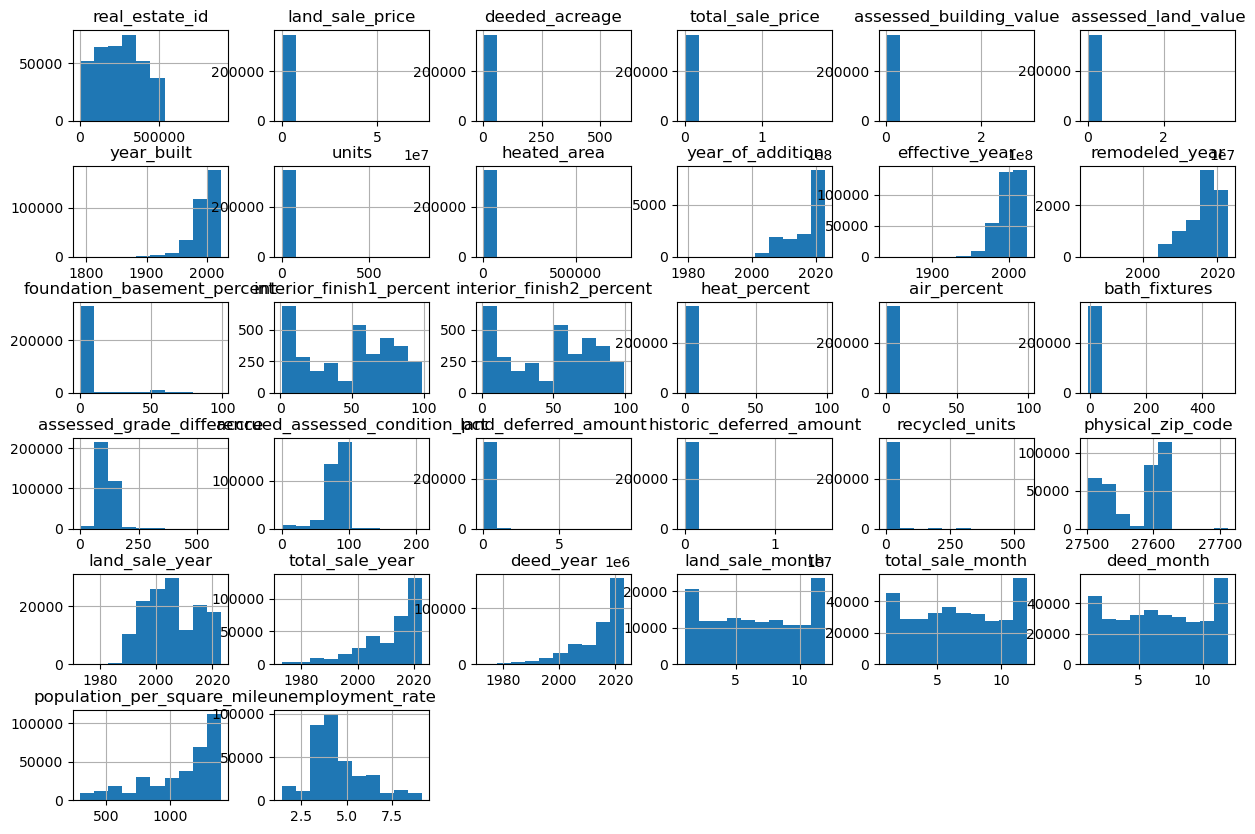

In [176]:
house.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

<FONT COLOR=RED> It looks like there are lots of features have asymmeric distribution, lot of outliers.



### 2.5.2 Statistic Description

In [179]:
des = house.describe(include='all')
des

,owner1,owner2,mailing_address1,mailing_address2,mailing_address3,real_estate_id,street_number,street_prefix,street_name,street_type,street_suffix,planning_jurisdiction,street_misc,township,fire_district,land_sale_price,zoning,deeded_acreage,total_sale_price,assessed_building_value,assessed_land_value,parcel_identification,special_district1,billing_class,property_description,land_classification,deed_book,deed_page,vcs,property_index,year_built,units,heated_area,utilities,year_of_addition,effective_year,remodeled_year,special_write_in,story_height,design_style,foundation_basement,foundation_basement_percent,exterior_wall,roof_floor_system,interior_finish1_percent,interior_finish2_percent,heat,heat_percent,air,air_percent,bath,bath_fixtures,built_in1_description,built_in2_description,built_in3_description,built_in4_description,built_in5_description,grade,assessed_grade_difference,accrued_assessed_condition_pct,land_deferred_code,land_deferred_amount,historic_deferred_code,historic_deferred_amount,recycled_units,disq_and_qual_flag,land_disq_and_qual_flag,type_and_use,physical_city,physical_zip_code,physical_location,land_sale_year,total_sale_year,deed_year,land_sale_month,total_sale_month,deed_month,distance_nearest_city,nearest_city,population_per_square_mile,unemployment_rate
count,346129,69626,346129,346127,5294,346129.000000,346129,346129,346129,346129,346129,346129,346129,346129,346129,3.461290e+05,346122,346129.000000,3.461290e+05,3.461290e+05,3.461290e+05,346129,2741,346129,346099,346121,345907,346129,346129,344909,340970.000000,346129.000000,346129.000000,343694,14372.000000,340967.000000,8838.000000,87,339750,339721,274117,346129.000000,339748,10550,3375.000000,3375.000000,339730,346129.000000,339752,346129.000000,339718,346129.000000,267759,598,65,3,14,340971,346129.000000,346129.000000,394,3.461290e+05,214,3.461290e+05,346129.000000,345888,134531,346129,346129,346129.000000,346129,138046.000000,346129.000000,346123.00000,138050.000000,346129.000000,346129.000000,346129.000000,346129,346129.000000,346129.000000
unique,313166,65999,299440,74243,1782,NaN,10623,9,18423,42,8,15,1046,20,4,NaN,313,NaN,NaN,NaN,NaN,346123,9,6,343364,23,17492,4031,5064,13201,NaN,NaN,NaN,15,NaN,NaN,NaN,40,15,15,6,NaN,26,6,NaN,NaN,7,NaN,3,NaN,10,NaN,21,13,13,2,14,276,NaN,NaN,1,NaN,1,NaN,NaN,19,18,104,19,NaN,345894,NaN,NaN,NaN,NaN,NaN,NaN,39.000000,18,NaN,NaN
top,AC BLACKWOLF RUN OWNER LLC,BEAUTIFUL DREAMER APARTMENTS INC,PO BOX 4090,SCOTTSDALE AZ 85261-4090,AGOURA HILLS CA 91301-2148,NaN,104,,MAIN,DR,,RA,,20,nan,NaN,R-4,NaN,NaN,NaN,NaN,0785.12 85 1079 004,RML,2,LO1,R,-E-,0001,09WC900,09WC900,NaN,NaN,NaN,ALL,NaN,NaN,NaN,ROOM HSE,C,A,D,NaN,A,C,NaN,NaN,A,NaN,A,NaN,D,NaN,One Fireplace,Sprinkler Syste,Sprinkler Syste,1 Passenger Ele,04FIRPL,B,NaN,NaN,L,NaN,H,NaN,NaN,A,A,1.0,RALEIGH,NaN,607SMAINST,NaN,NaN,NaN,NaN,NaN,NaN,1.948787,RALEIGH,NaN,NaN
freq,329,21,1683,1683,697,NaN,2576,335031,665,110357,345760,133841,333389,36479,280890,NaN,43338,NaN,NaN,NaN,NaN,2,1335,315203,130,316762,1043,1240,978,976,NaN,NaN,NaN,255262,NaN,NaN,NaN,38,154927,250280,225220,NaN,171358,5337,NaN,NaN,336813,NaN,334211,NaN,134111,NaN,254284,259,25,2,1,37118,NaN,NaN,394,NaN,214,NaN,NaN,316731,82744,324788,158004,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,23883.000000,85190,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,252657.326375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.944629e+04,NaN,0.517736,3.902407e+05,3.160589e+05,1.084197e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.149218,1.145917,2848.997914,NaN,2016.793905,1999.582458,2016.516633,NaN,NaN,NaN,NaN,2.275666,NaN,NaN,47.039407,47.039407,NaN,0.085532,NaN,0.180152,NaN,0.528083,NaN,NaN,NaN,NaN,NaN,NaN,117.107613,80.787004,NaN,7.002975e+02,NaN,4.707648e+02,1.215642,NaN,NaN,NaN,NaN,27571.994473,NaN,2005.259696,2011.243273,2013.26759,6.563593,6.609490,6.642154,NaN,NaN,1078.308440,4.452135
std,NaN,NaN,NaN,NaN,NaN,138064.605726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.309334e+05,NaN,2.494732,1.868029e+06,1.416445e+06,3.523910e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### 2.5.3 features type

In [191]:
continuous_features = list(des.columns[des.T['mean'].notna()])
continuous_features

['real_estate_id',
 'land_sale_price',
 'deeded_acreage',
 'total_sale_price',
 'assessed_building_value',
 'assessed_land_value',
 'year_built',
 'units',
 'heated_area',
 'year_of_addition',
 'effective_year',
 'remodeled_year',
 'foundation_basement_percent',
 'interior_finish1_percent',
 'interior_finish2_percent',
 'heat_percent',
 'air_percent',
 'bath_fixtures',
 'assessed_grade_difference',
 'accrued_assessed_condition_pct',
 'land_deferred_amount',
 'historic_deferred_amount',
 'recycled_units',
 'physical_zip_code',
 'land_sale_year',
 'total_sale_year',
 'deed_year',
 'land_sale_month',
 'total_sale_month',
 'deed_month',
 'population_per_square_mile',
 'unemployment_rate']

In [193]:
categorical_features = list(set(house.columns) - set(continuous_features))
categorical_features

['built_in1_description',
 'type_and_use',
 'grade',
 'parcel_identification',
 'built_in2_description',
 'street_number',
 'special_write_in',
 'street_prefix',
 'built_in5_description',
 'street_type',
 'disq_and_qual_flag',
 'planning_jurisdiction',
 'built_in3_description',
 'mailing_address1',
 'built_in4_description',
 'nearest_city',
 'property_index',
 'physical_location',
 'exterior_wall',
 'heat',
 'land_disq_and_qual_flag',
 'street_name',
 'property_description',
 'roof_floor_system',
 'land_classification',
 'owner2',
 'fire_district',
 'utilities',
 'historic_deferred_code',
 'owner1',
 'township',
 'land_deferred_code',
 'story_height',
 'vcs',
 'physical_city',
 'street_misc',
 'special_district1',
 'mailing_address2',
 'mailing_address3',
 'deed_book',
 'air',
 'deed_page',
 'zoning',
 'billing_class',
 'foundation_basement',
 'design_style',
 'street_suffix',
 'distance_nearest_city',
 'bath']

### 2.5.4 Output File

In [90]:
house.to_csv('house_Oct29_2023.csv')

## 2.6 Conclusion

<font color=red>although submitted this notebook as data wrangling of capstone two. but the data wangling process are not over at all, we will keep doing data wrangling through the whole project.